In [5]:
import glob
import pandas as pd
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# Leading SPACE!!!
angle_type_prefix = ' pose_R'
angle_type_prefix = ' p_r'

# angle_type = angle_type_prefix + 'x'
# head_class = 'nod'
# width_threshold = 2.18
# height_threshold = 0.0032

FILTER_KERNEL = 9 # 7 or 9 si max
FRAME_RATE = 30

def get_peaks_params(head_class, angle_type, derivative):
    
    all_widths = []
    all_heights = []
    avg_w = []
    avg_h = []

    # CHANGE PATH!!!
    for csv_file in glob.glob('./data/' + head_class + '/*.csv'):
        df = pd.read_csv(csv_file)

        # Resample to common frame rate
        csv_frame_rate = (df.shape[0] - 1) / np.sum(np.diff(df[' timestamp']))
        # print('csv frame rate: ', csv_frame_rate)
        n_resampled_points = int(1 + (len(df[angle_type]) - 1) * FRAME_RATE / csv_frame_rate)
        angles = scipy.signal.resample(df[angle_type], num=n_resampled_points)
        
#         angles = np.diff(angles)

        # Filter
        angles_filt = scipy.signal.medfilt(angles, kernel_size=FILTER_KERNEL)

        fc = 3
        b, a = scipy.signal.butter(N=2, Wn=2*fc/FRAME_RATE, btype='low', analog=False, output='ba')
    #     angles_filt = scipy.signal.filtfilt(b, a, angles)

    #     annotations = np.zeros((len(angles)))

        # Get peak locations
        pos_peaks, _ = scipy.signal.find_peaks(angles_filt)
        neg_peaks, _ = scipy.signal.find_peaks(-angles_filt)

        curr_w = []
        curr_h = []
        # Detect neighboring +- and -+
        i, j = 0, 0
        while i < len(pos_peaks) and j < len(neg_peaks):
            all_widths.append(abs(pos_peaks[i] - neg_peaks[j]))
            all_heights.append(angles_filt[pos_peaks[i]] - angles_filt[neg_peaks[j]])
            
            # GET RATIO
            all_heights[-1] = all_heights[-1] / all_widths[-1]
            
            curr_w.append(all_widths[-1])
            curr_h.append(all_heights[-1])
            
            # + -
            if pos_peaks[i] < neg_peaks[j]:
                i += 1
            # - +
            elif pos_peaks[i] > neg_peaks[j]:
                j += 1
            else:
                raise Exception('Postive and negative peaks coincide!')
                
        avg_w.append(np.mean(curr_w))
        avg_h.append(np.mean(curr_h))

        # Plot
        plt.figure(figsize=(14, 4))
    #     plt.subplot(211)
    #     for p in peaks:
    #         plt.axvline(p, linewidth=1.5, color='k')

        plt.plot(angles, '-o')
        plt.plot(angles_filt)
    #     plt.subplot(212)
    #     df = np.diff(angles)
    # #     plt.plot(df)
    #     plt.plot(np.diff(angles_filt))

    #     fd = scipy.signal.medfilt(df, kernel_size=FILTER_KERNEL)
    #     plt.plot(fd)
        for p in pos_peaks:
            plt.axvline(p, color='red')
        for p in neg_peaks:
            plt.axvline(p, color='blue')
    #     plt.tight_layout(h_pad=-4.9)
        plt.xlim(0, 200)
        plt.show()

        # Save as a new file PANDAS

    #     break

    return all_widths, all_heights, avg_w, avg_h


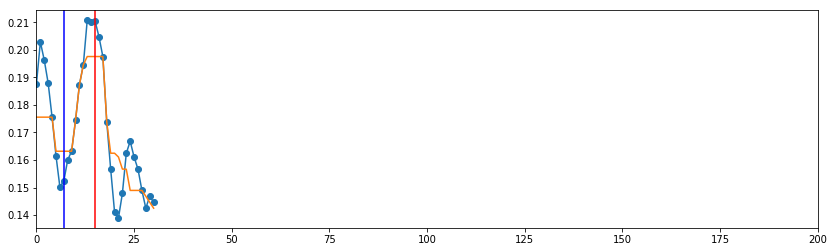

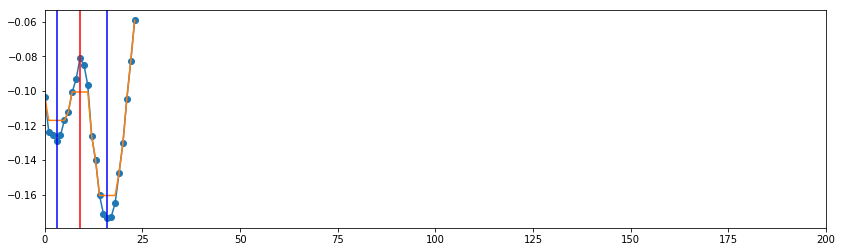

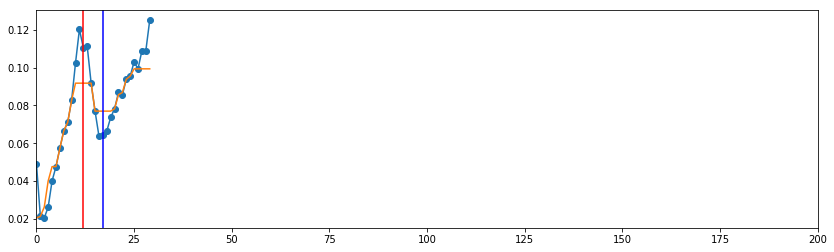

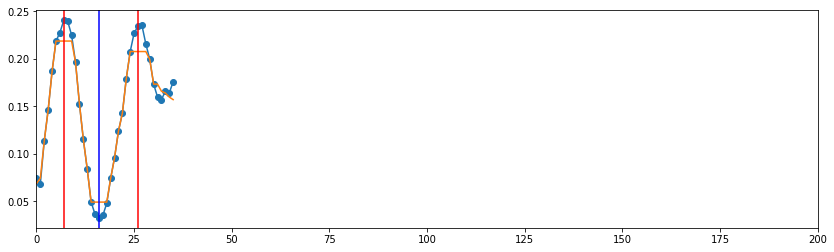

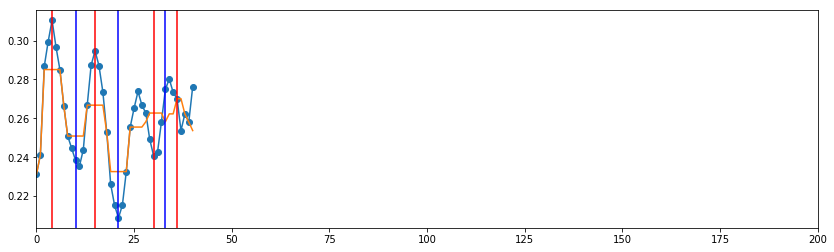

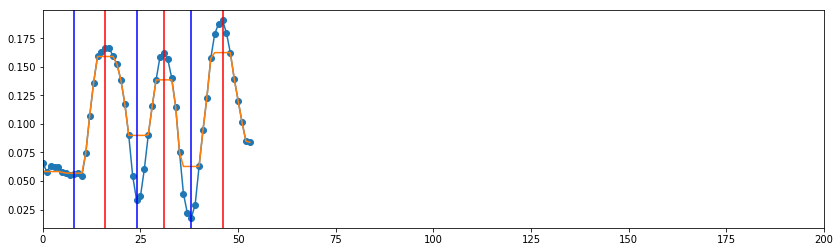

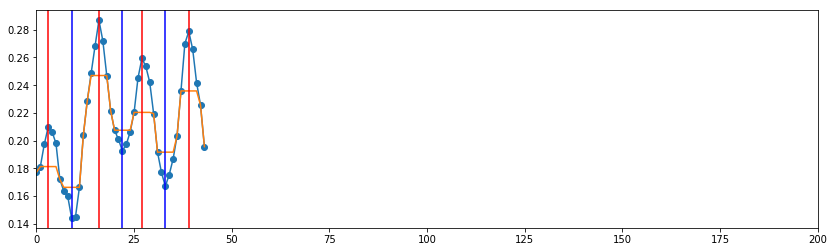

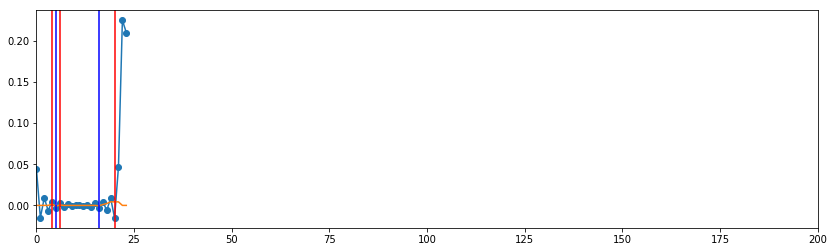

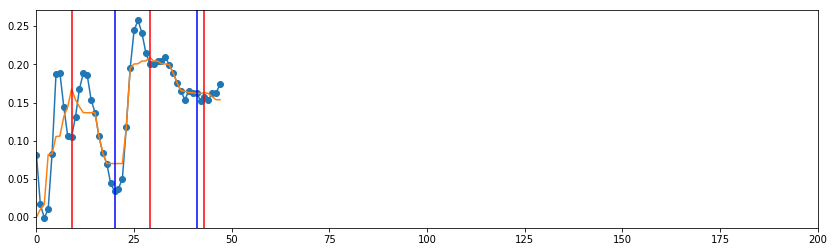

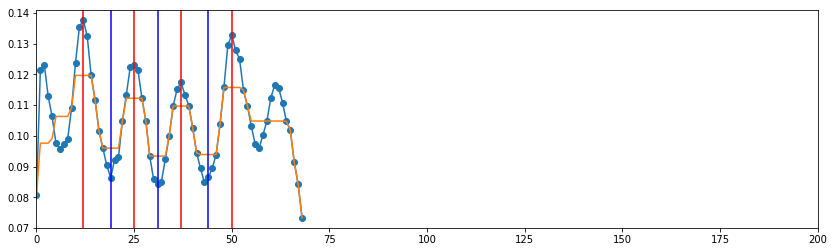

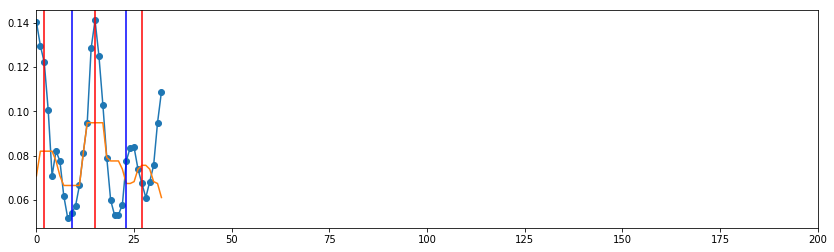

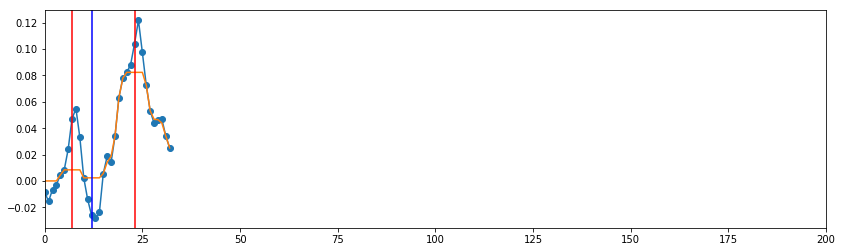

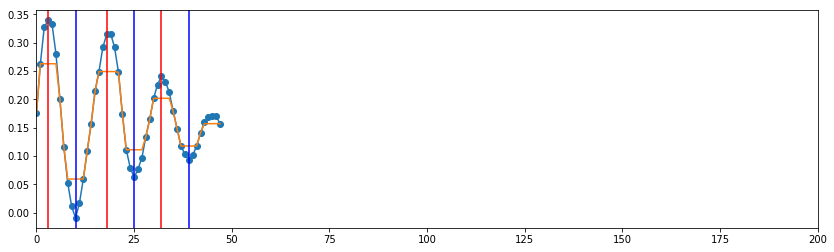

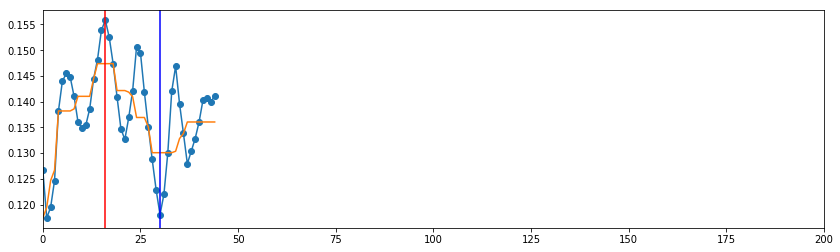

/home/ICT2000/jondras/anaconda3/envs/ICMI_head/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ICT2000/jondras/anaconda3/envs/ICMI_head/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


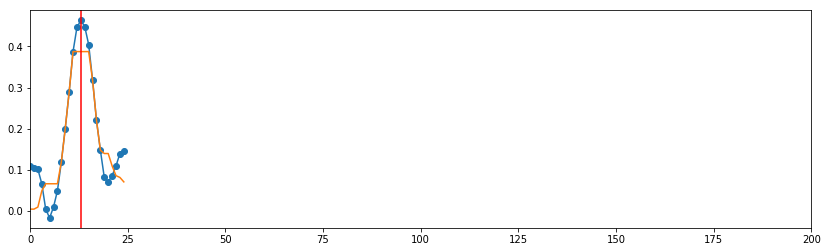

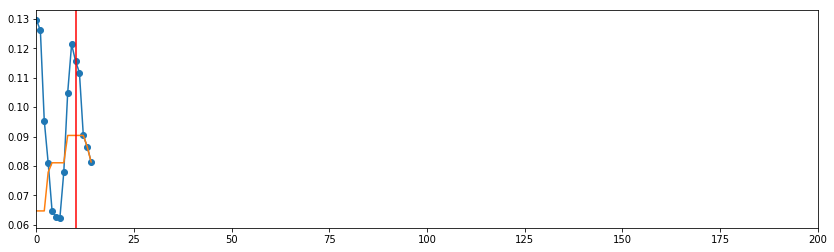

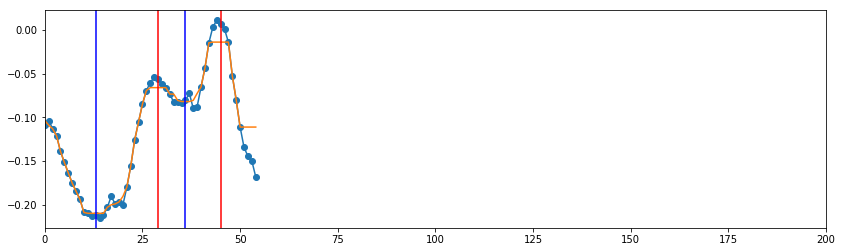

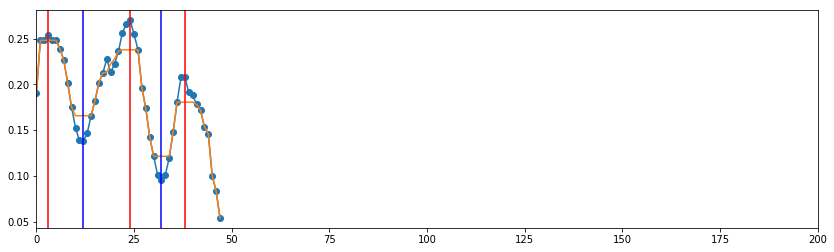

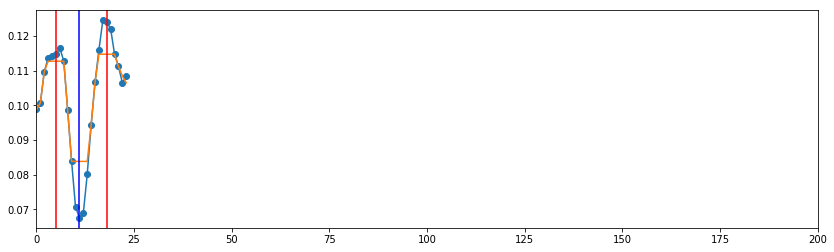

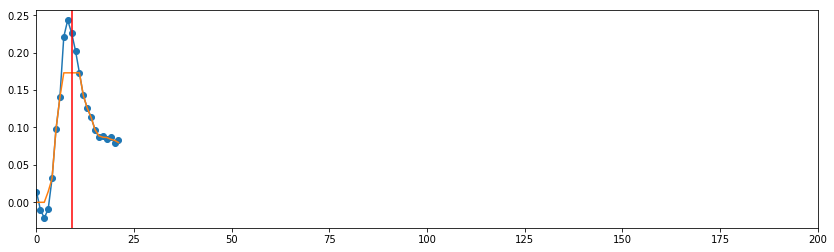

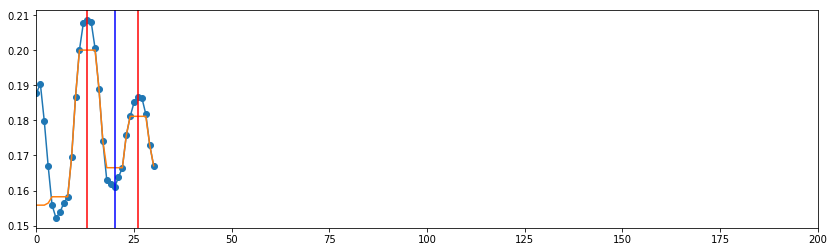

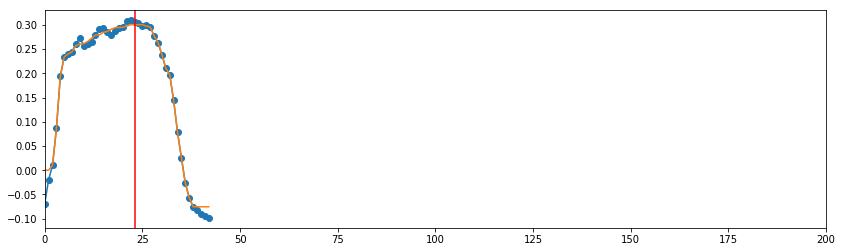

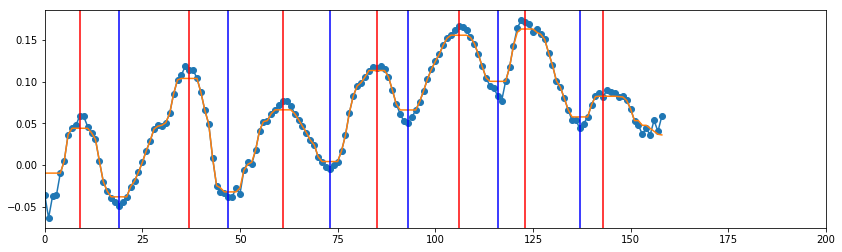

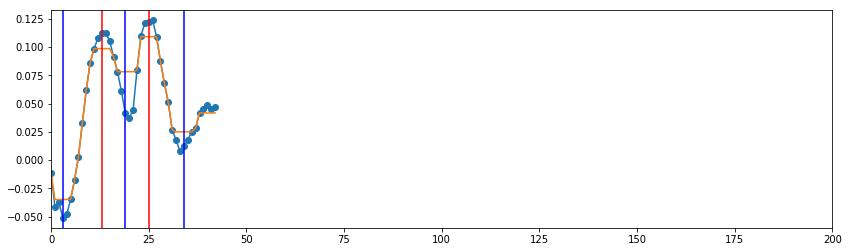

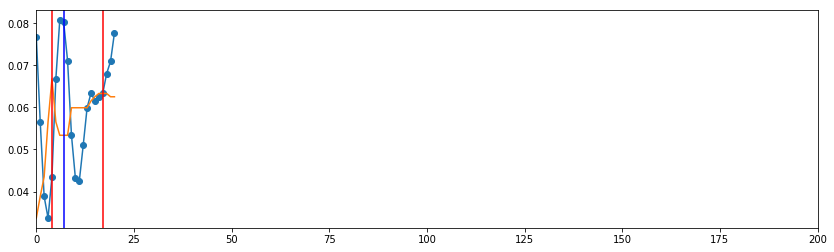

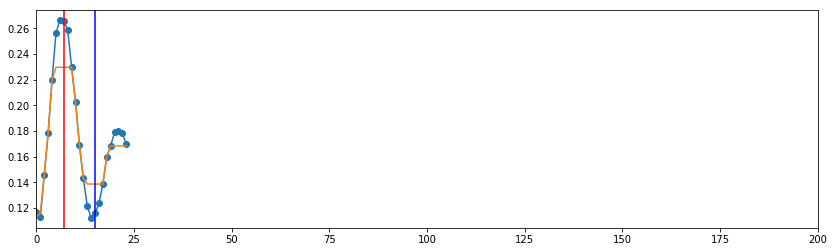

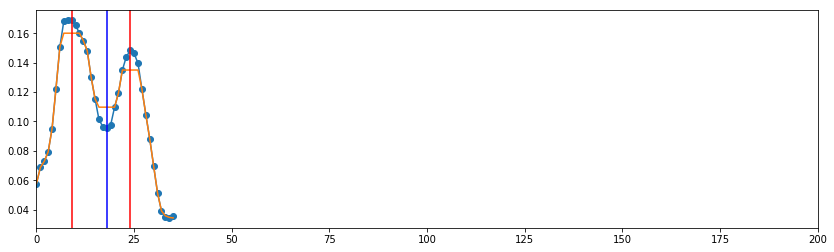

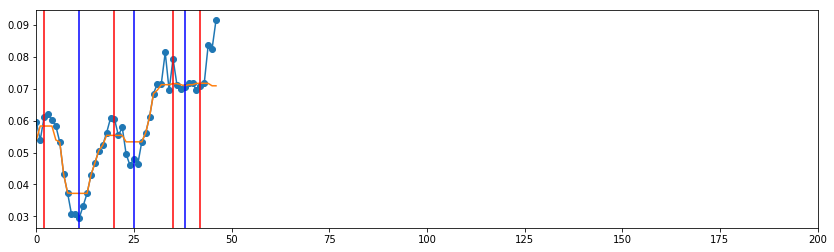

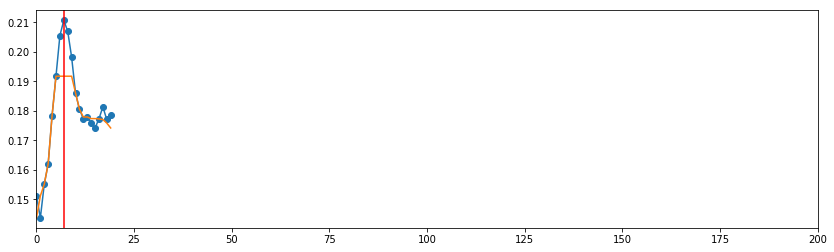

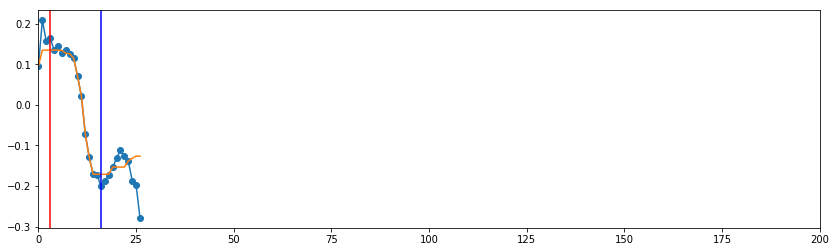

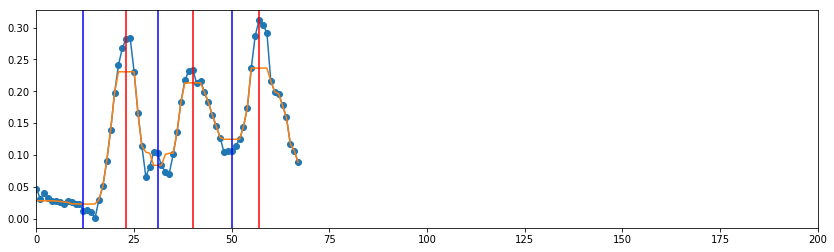

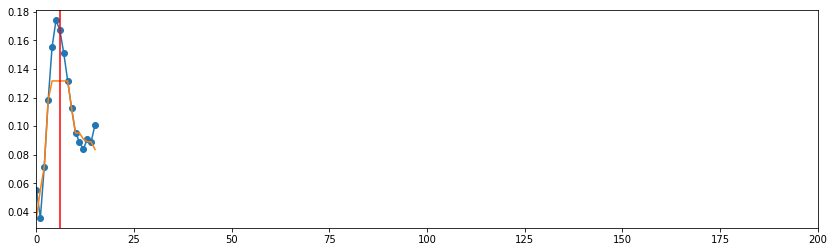

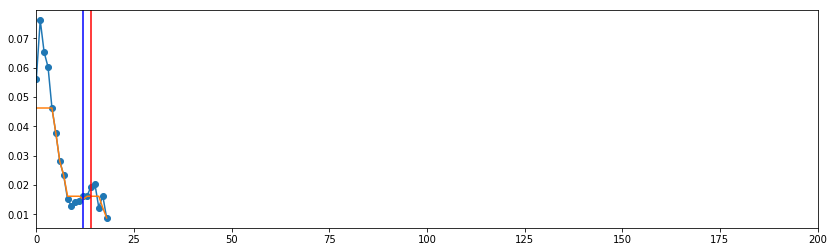

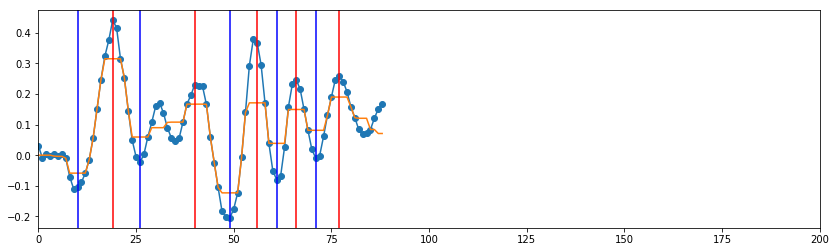

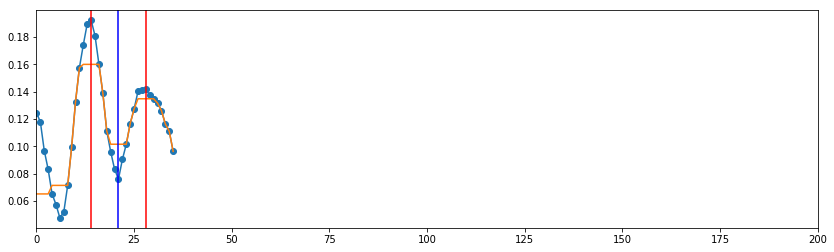

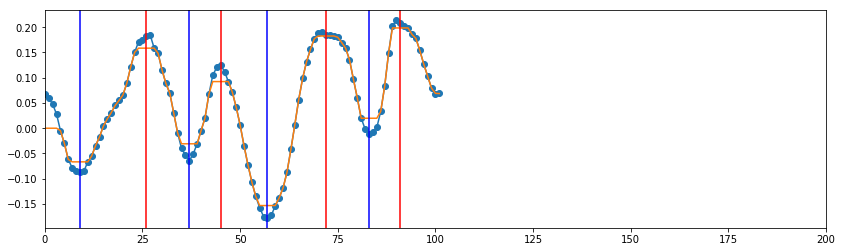

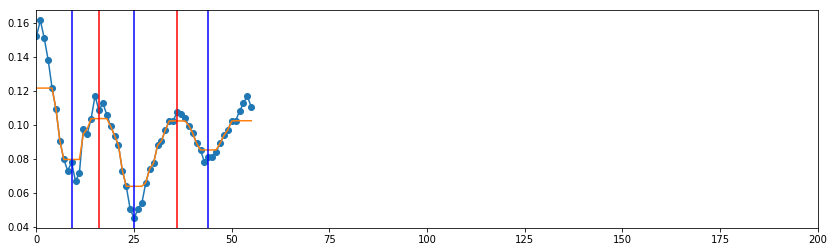

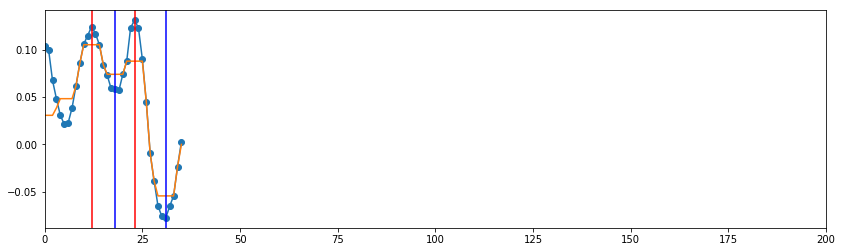

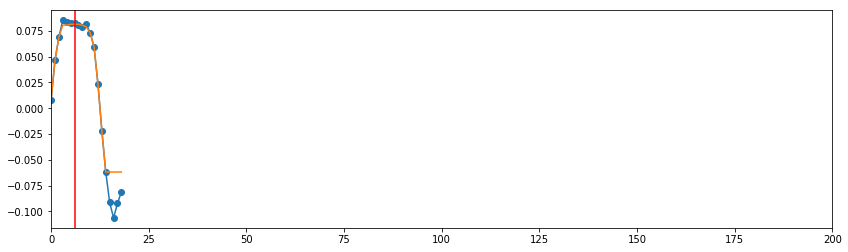

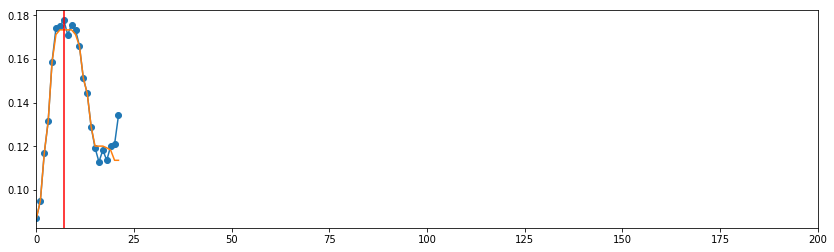

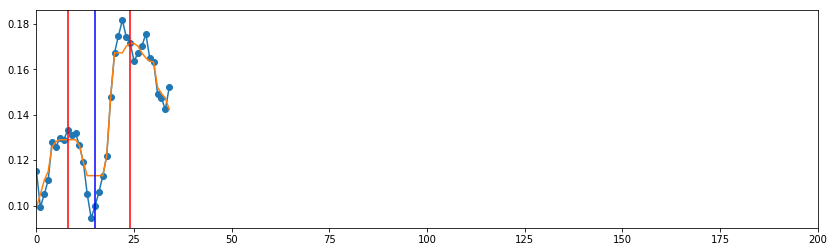

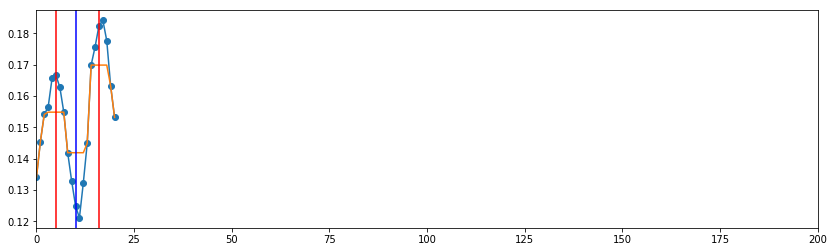

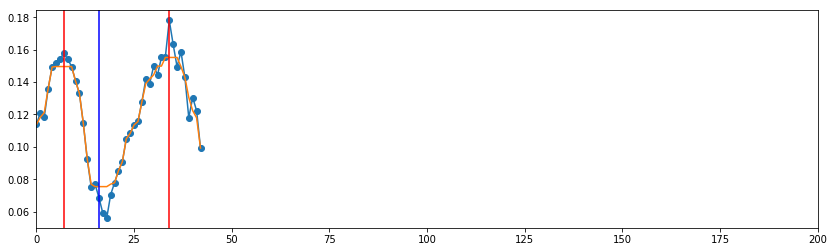

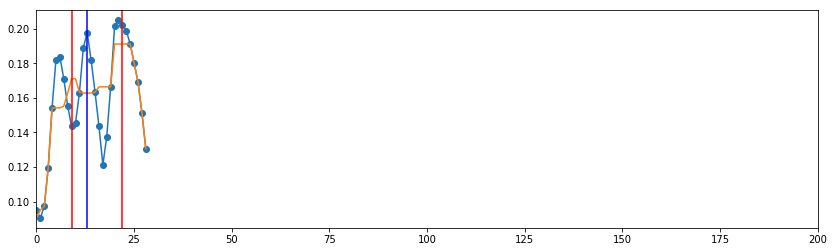

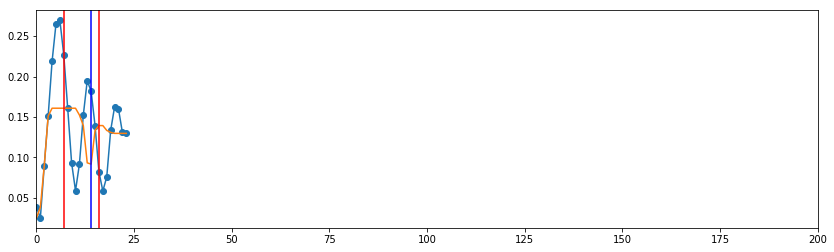

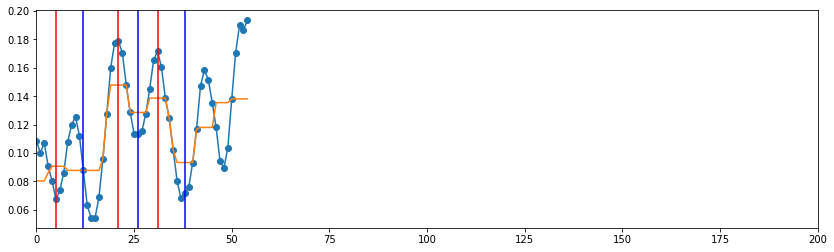

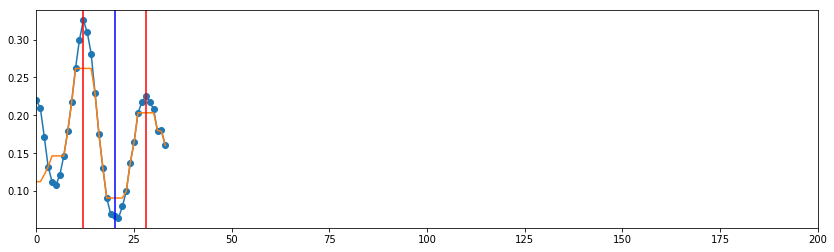

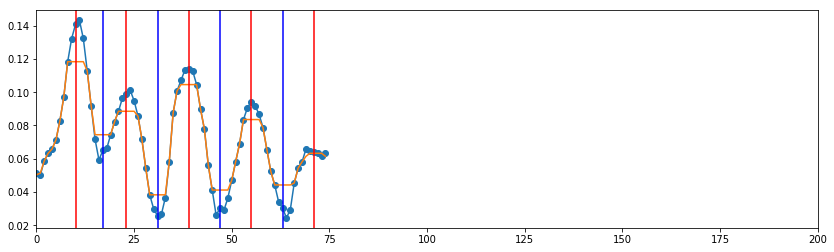

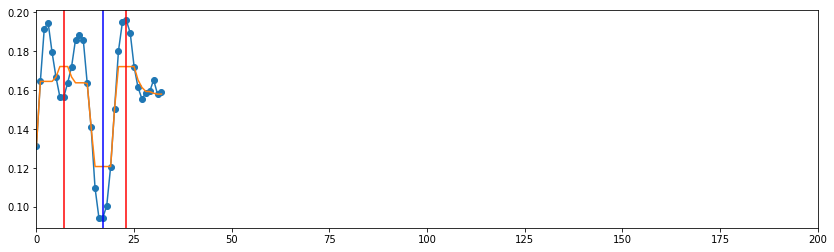

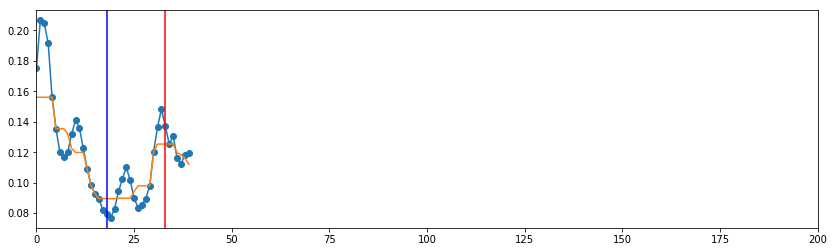

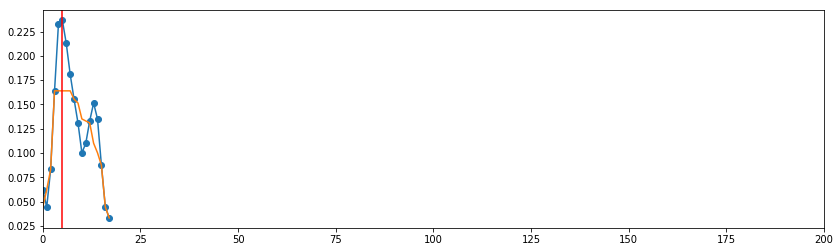

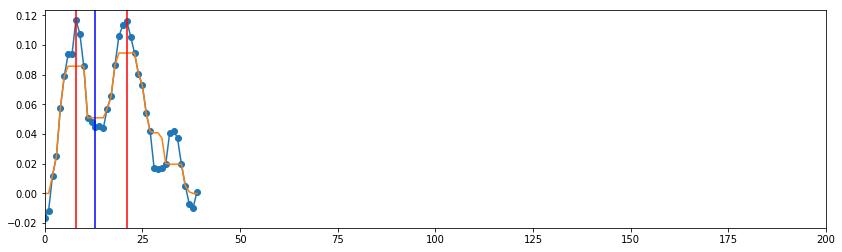

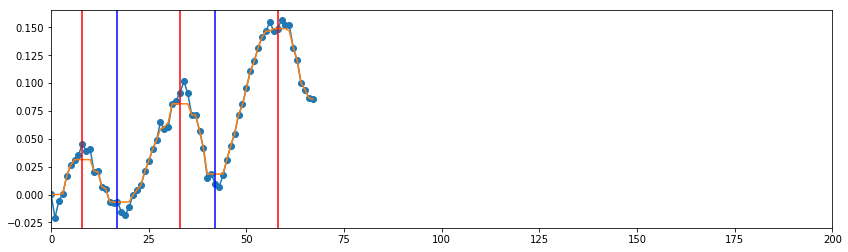

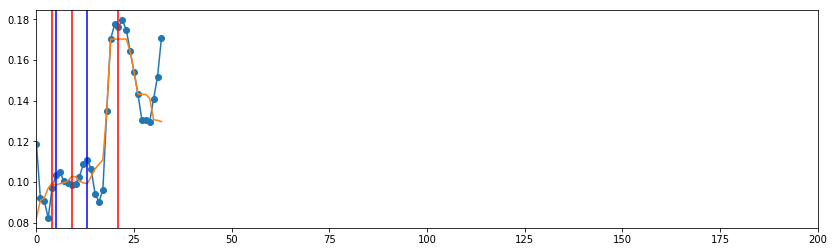

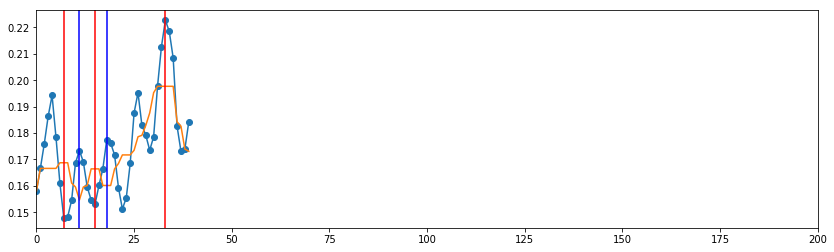

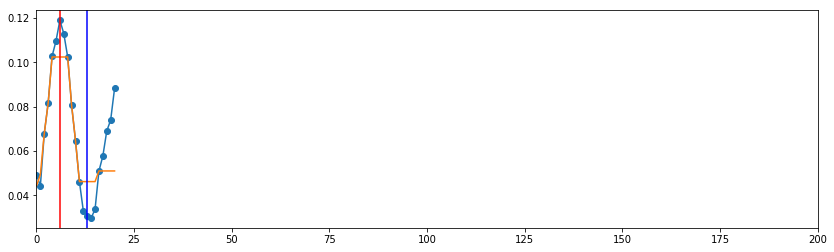

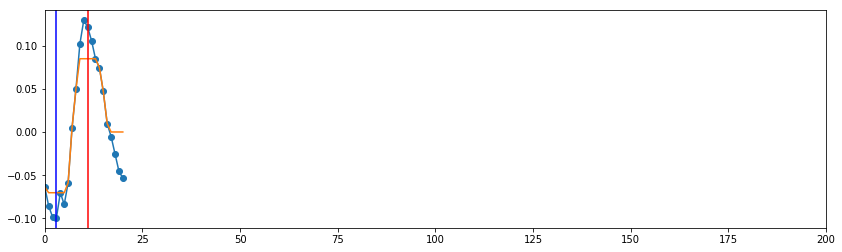

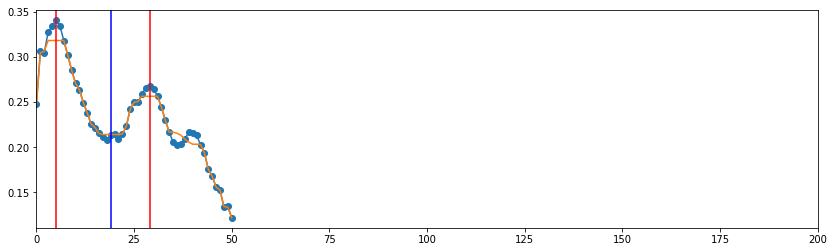

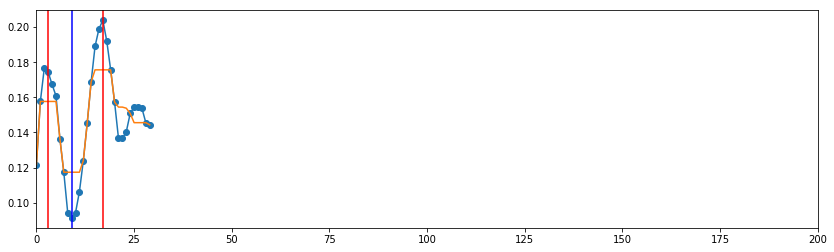

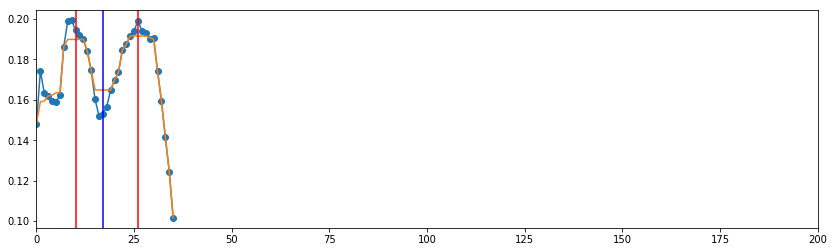

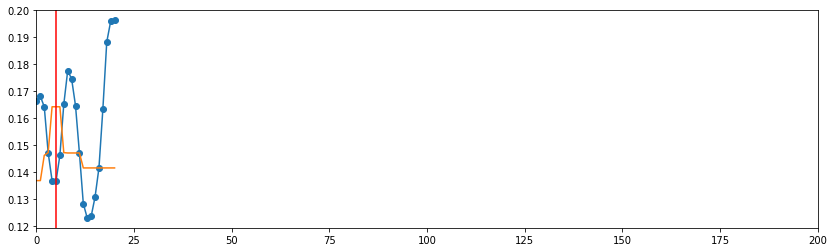

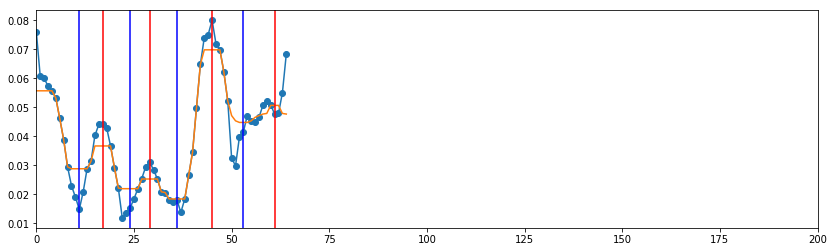

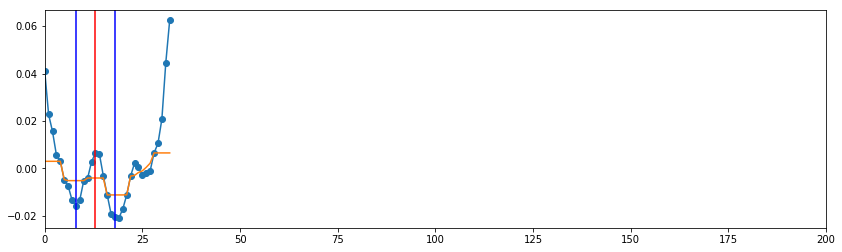

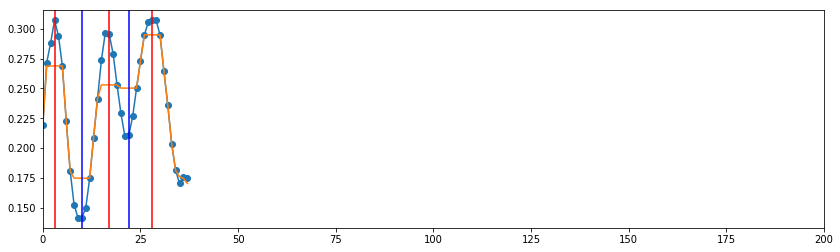

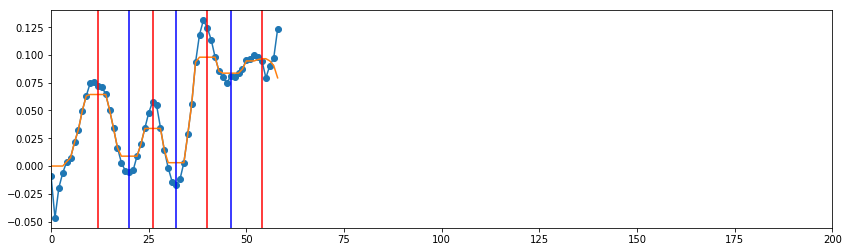

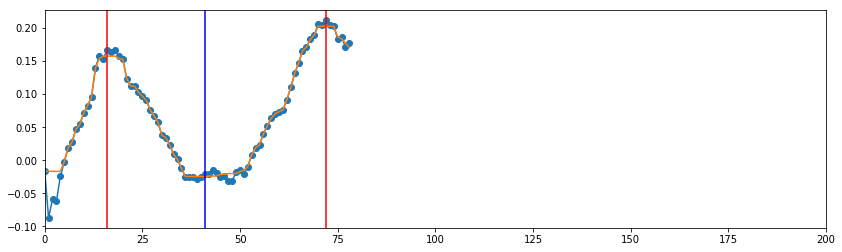

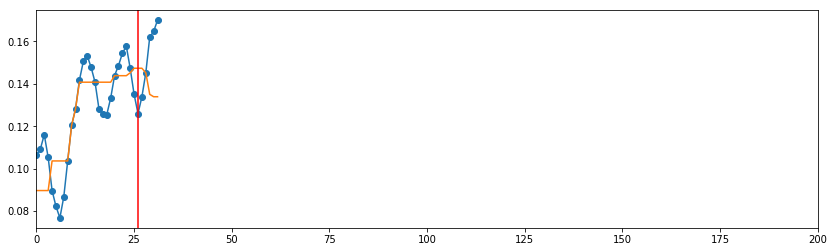

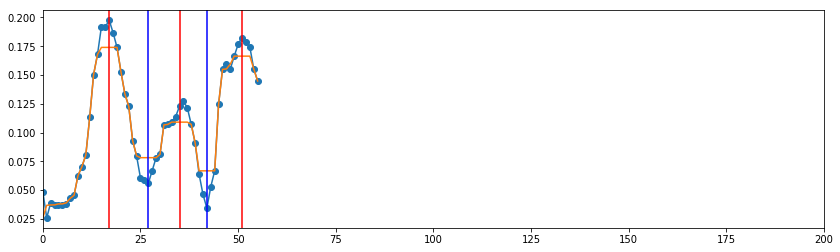

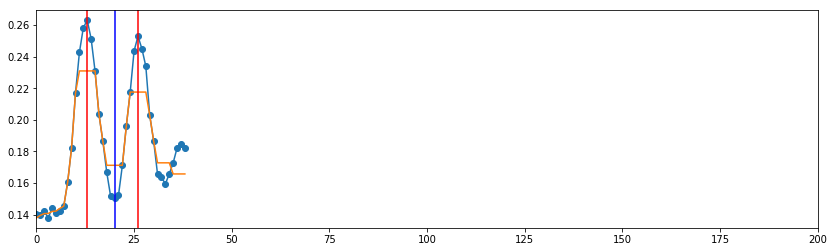

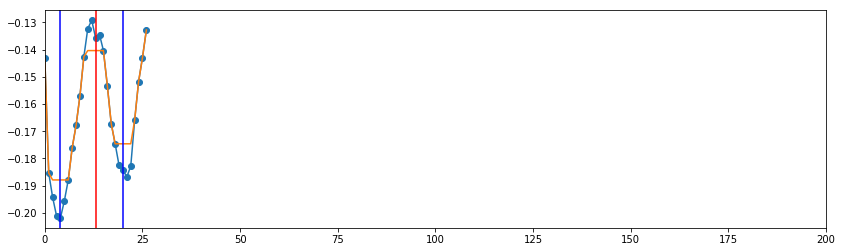

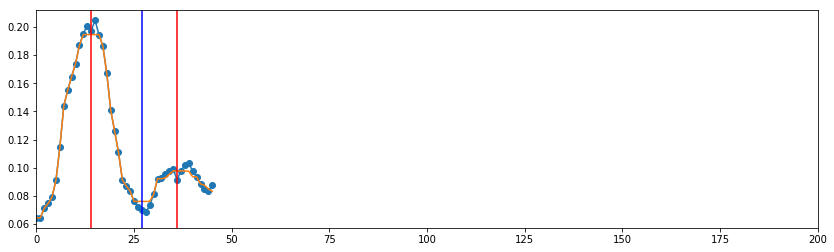

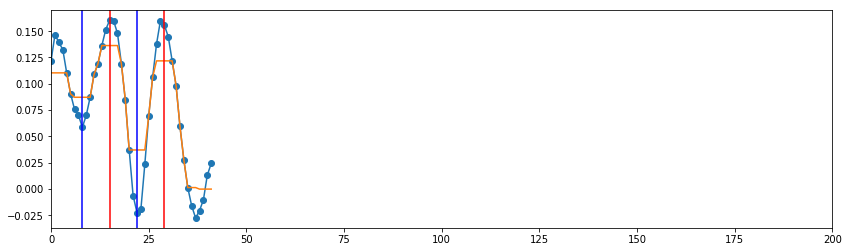

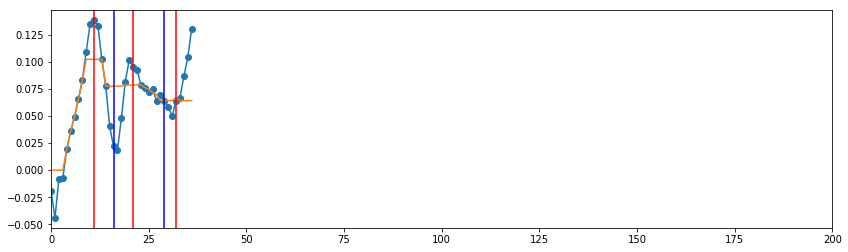

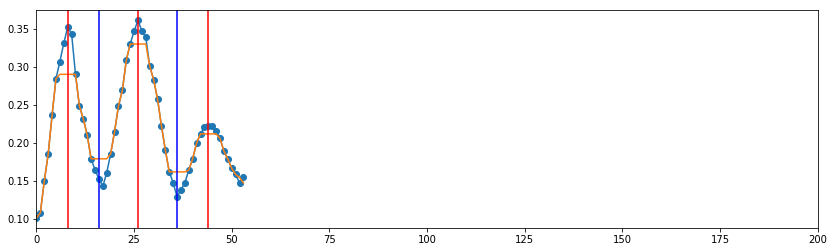

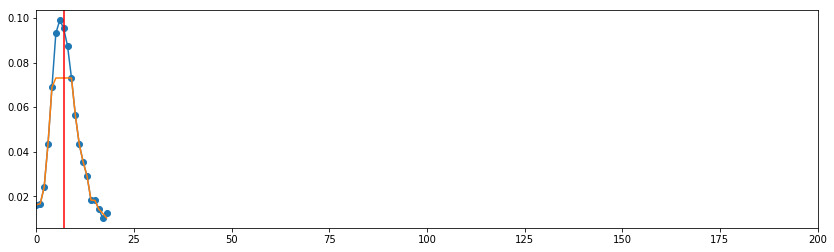

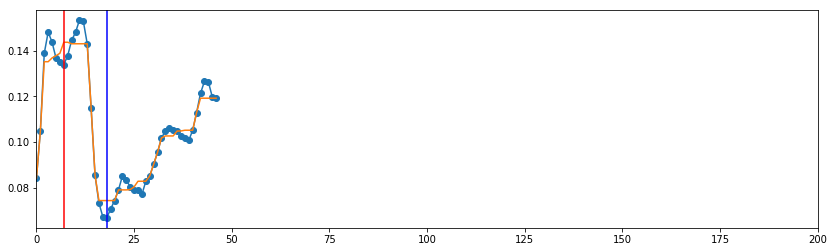

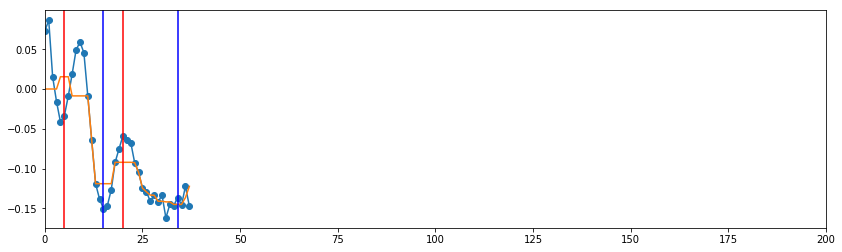

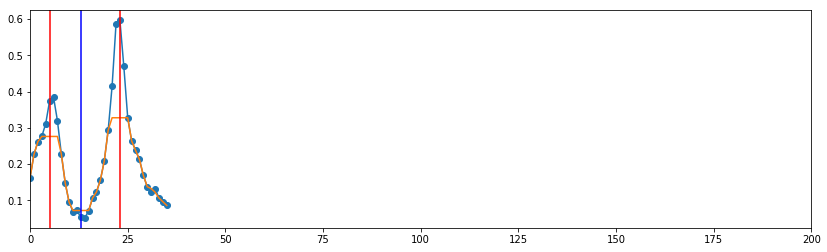

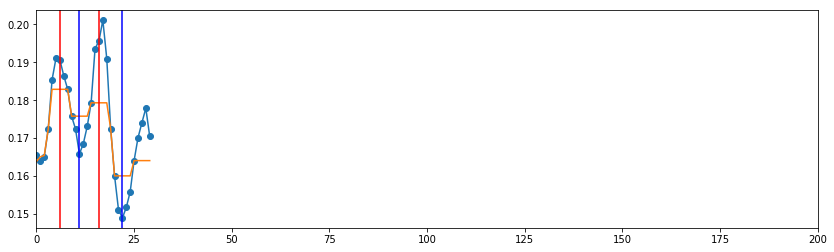

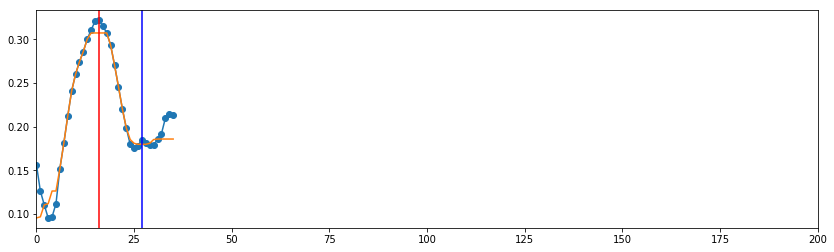

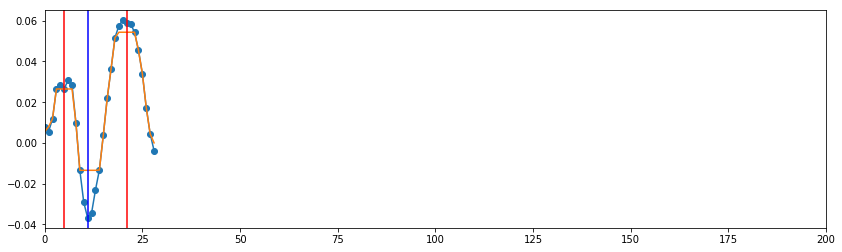

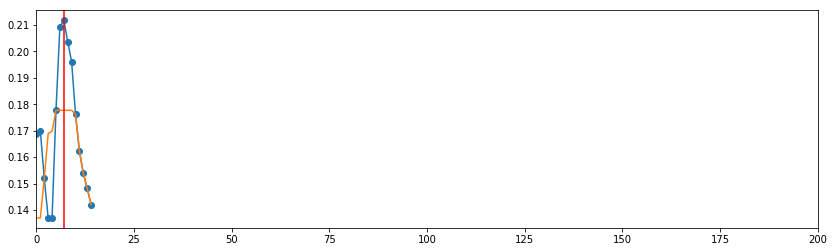

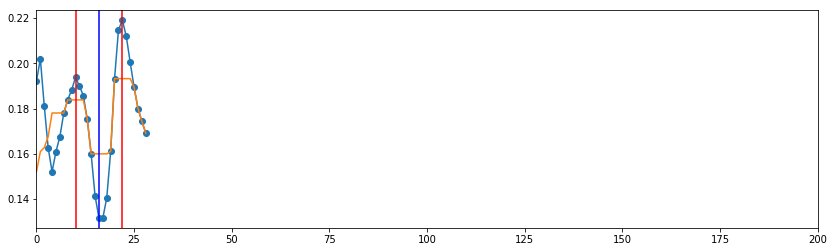

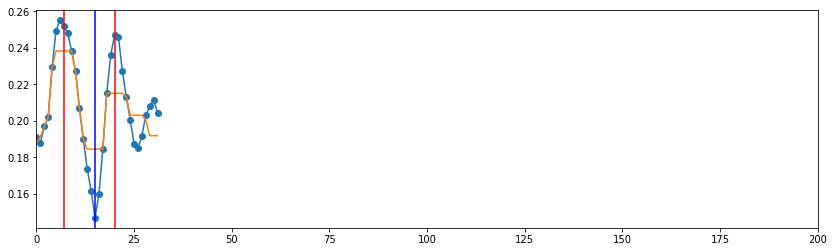

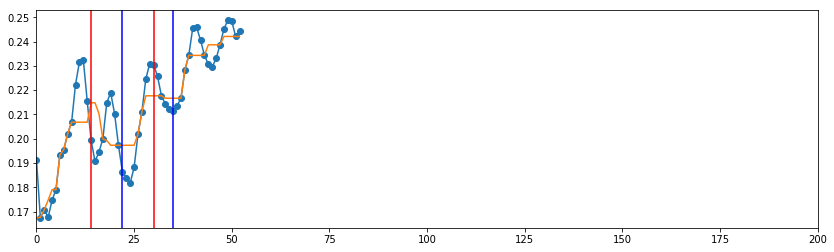

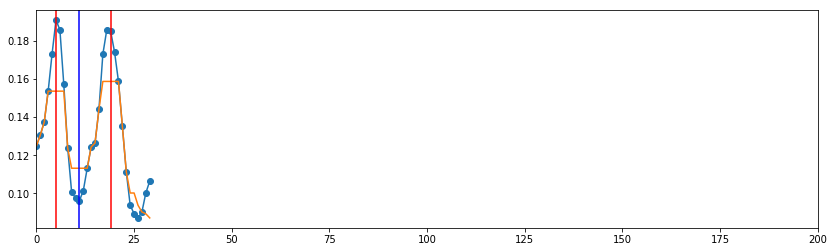

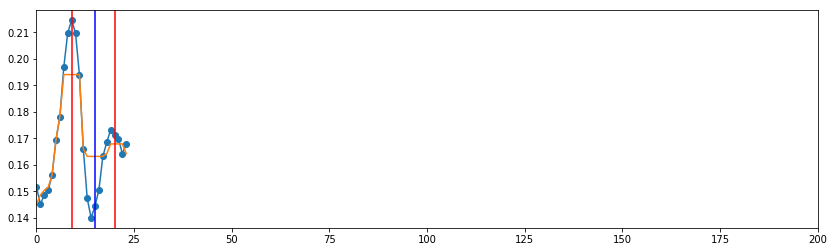

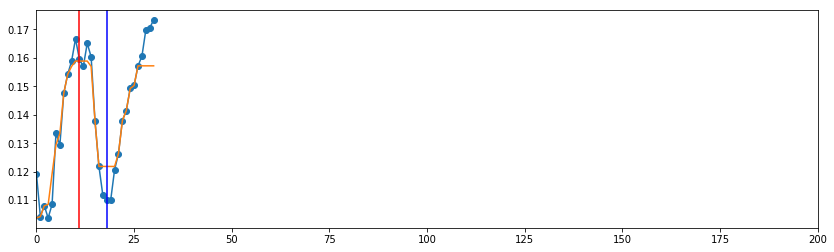

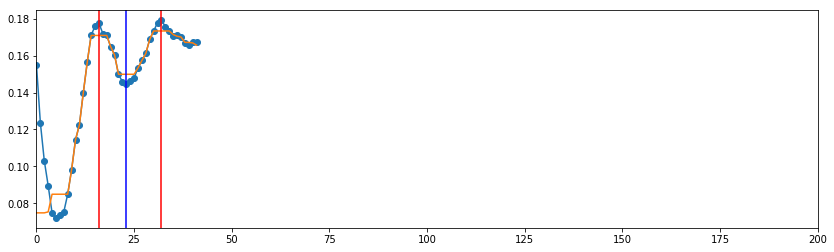

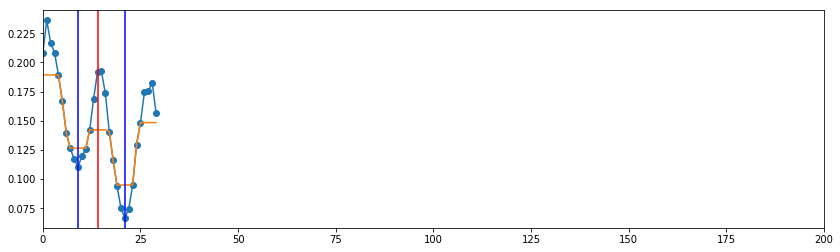

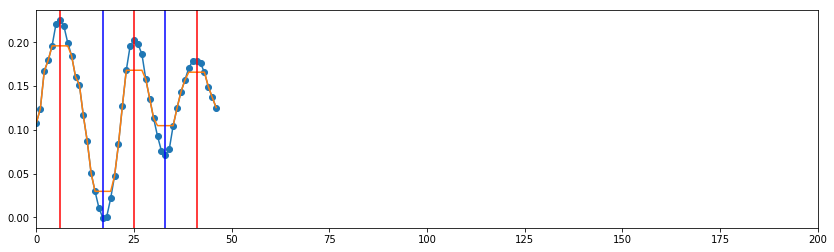

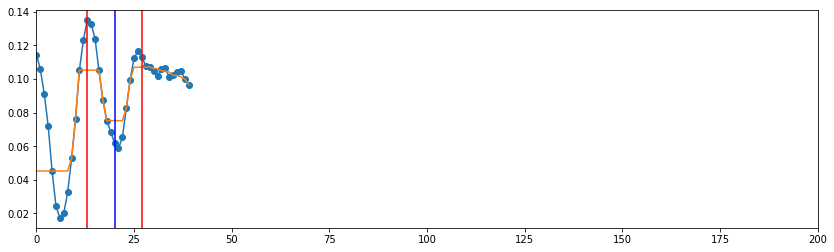

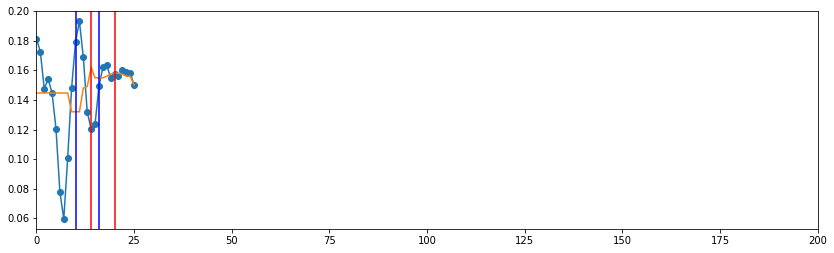

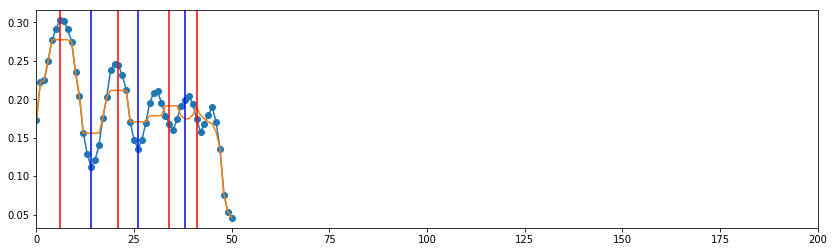

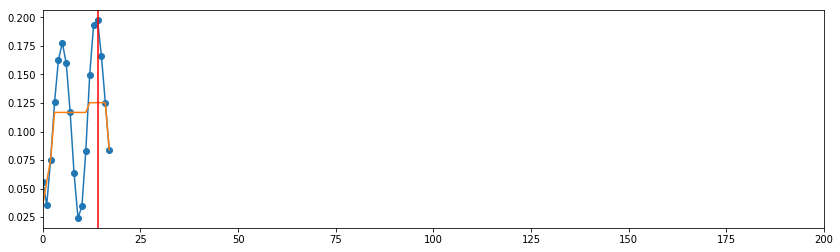

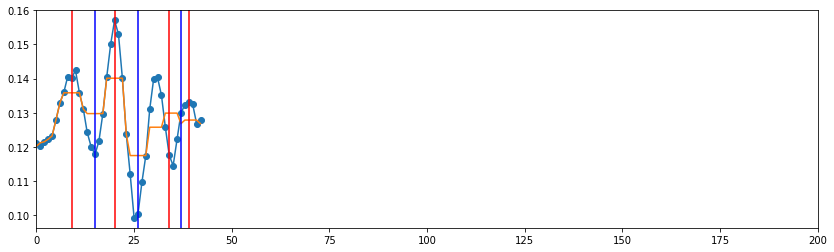

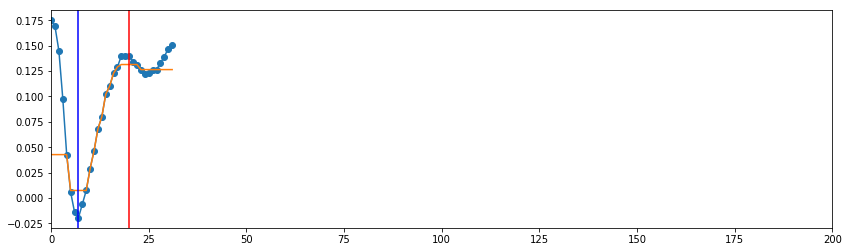

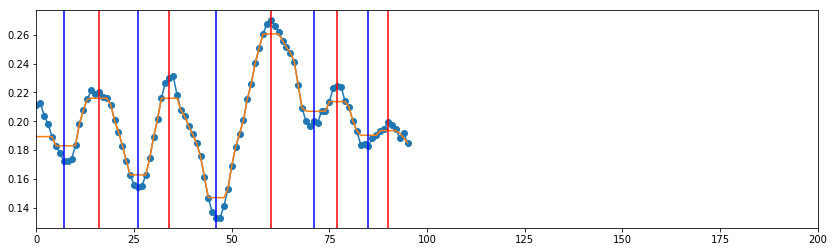

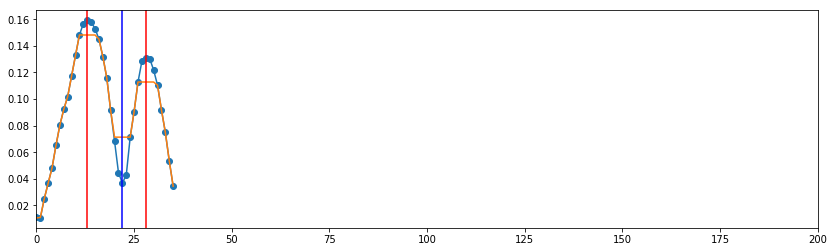

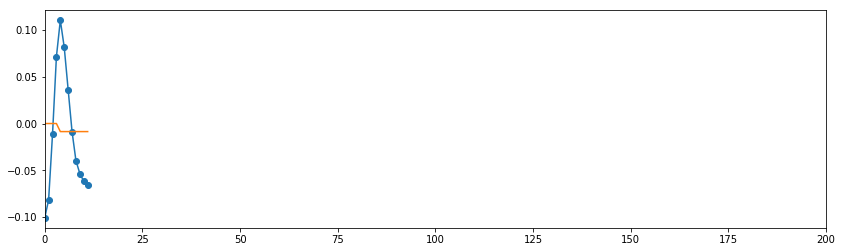

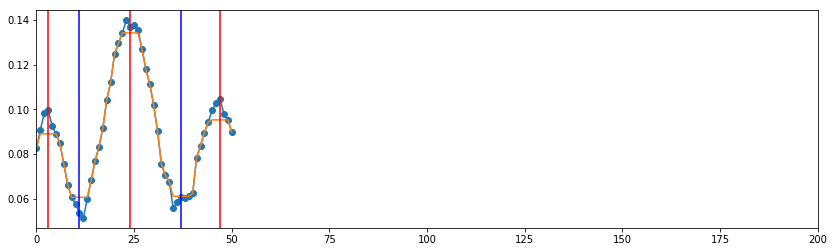

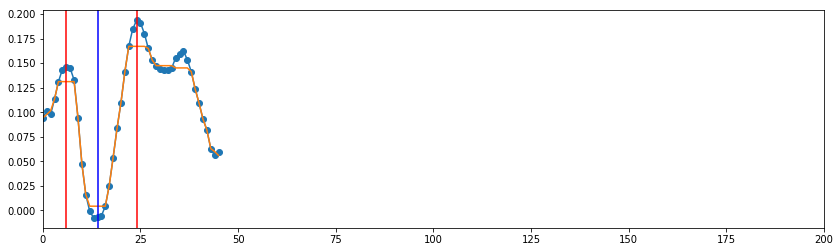

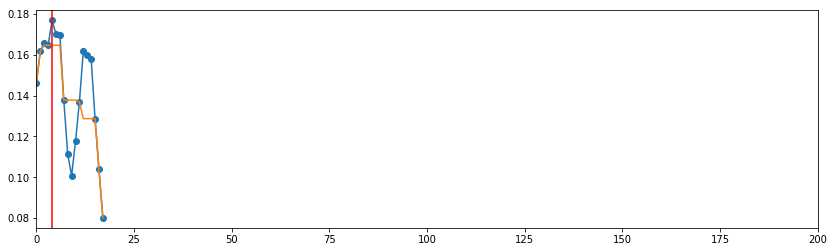

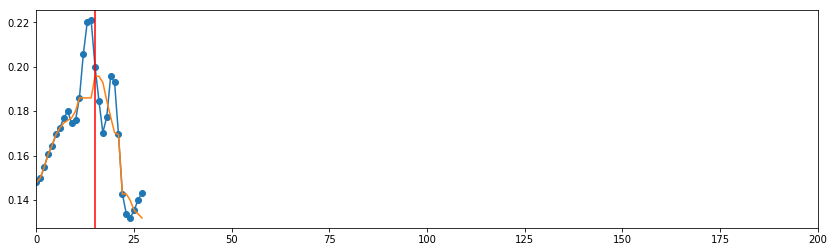

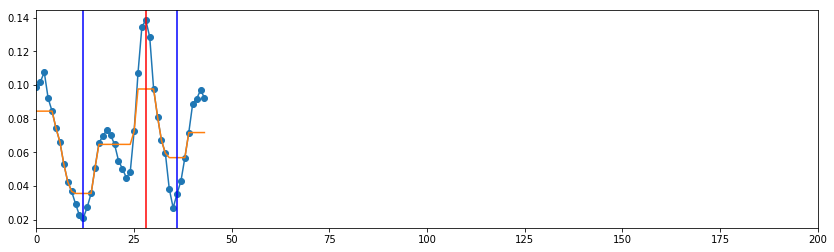

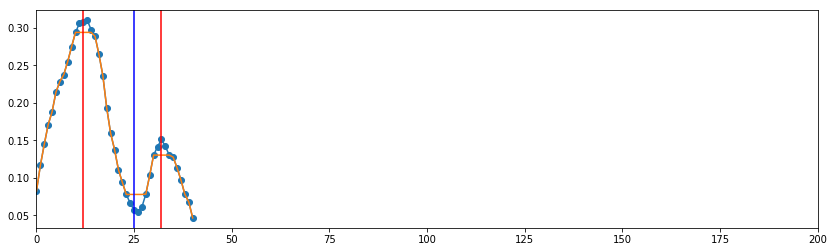

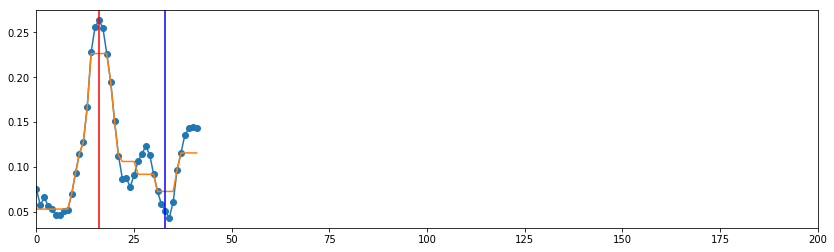

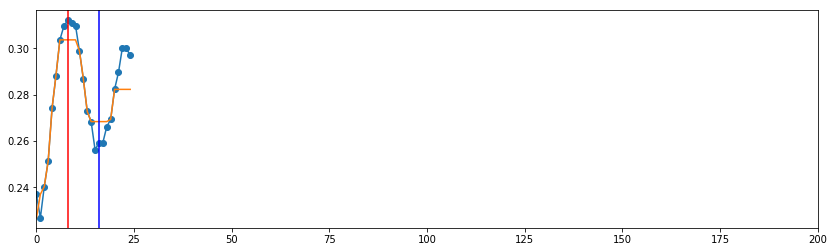

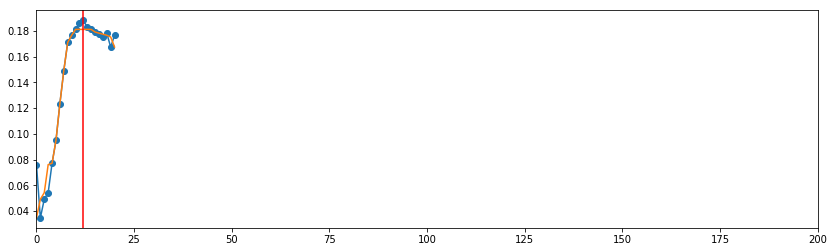

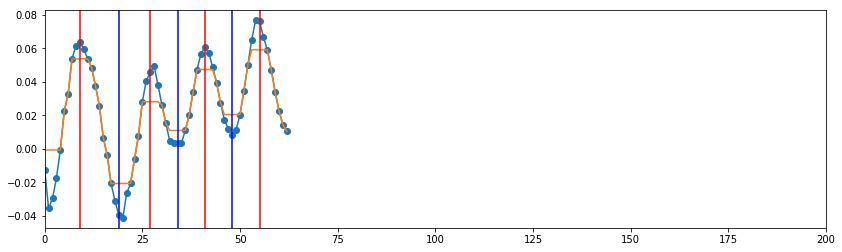

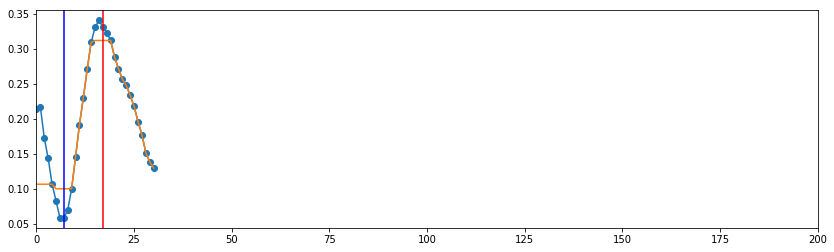

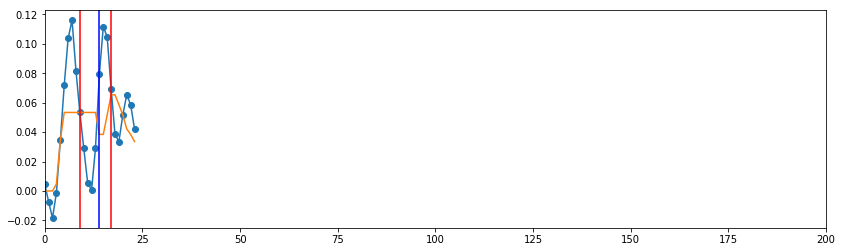

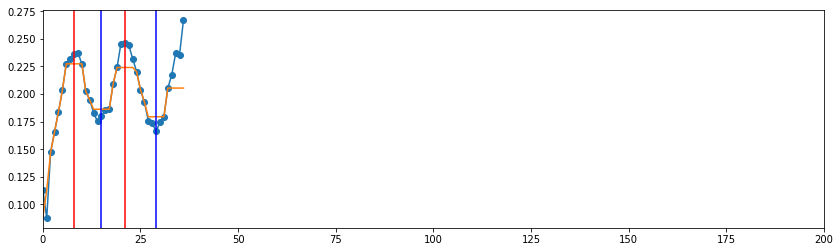

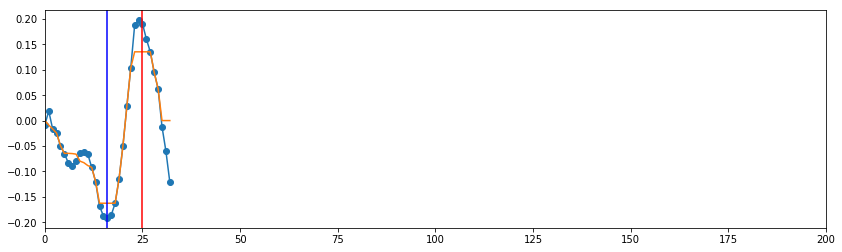

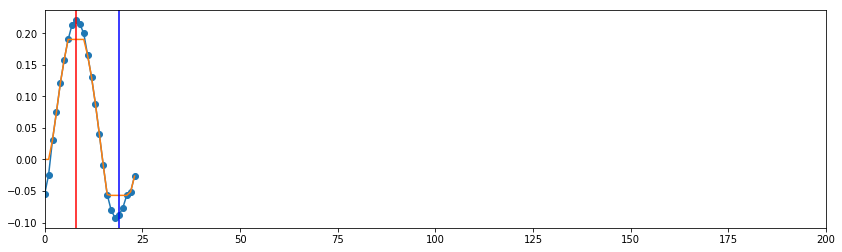

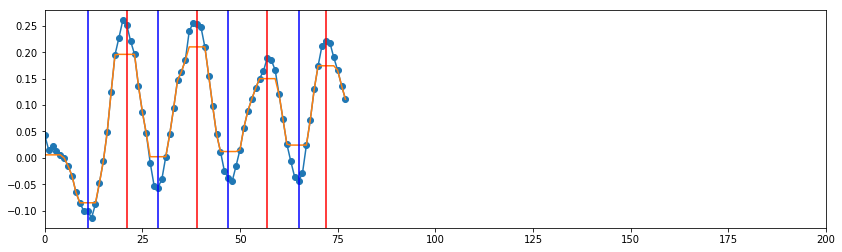

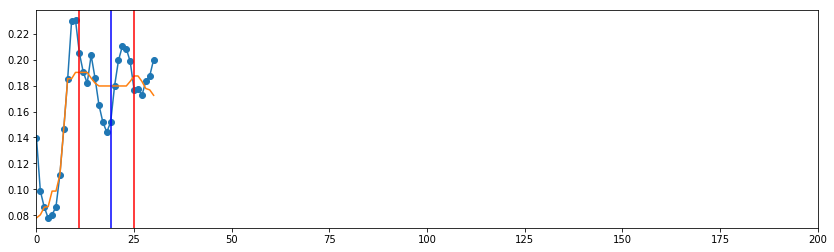

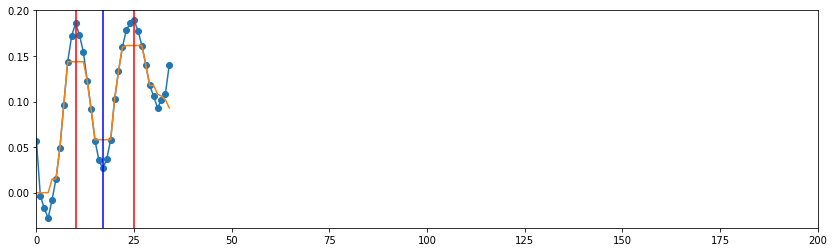

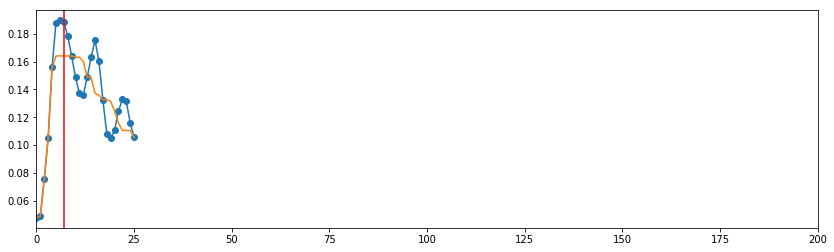

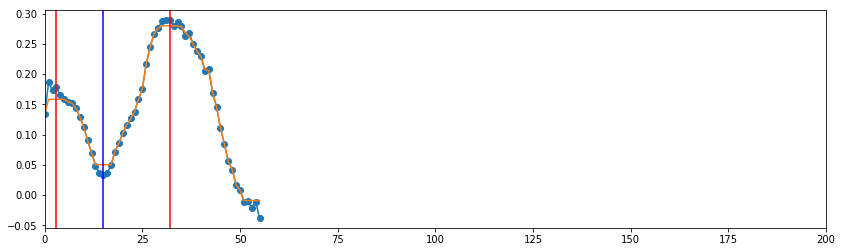

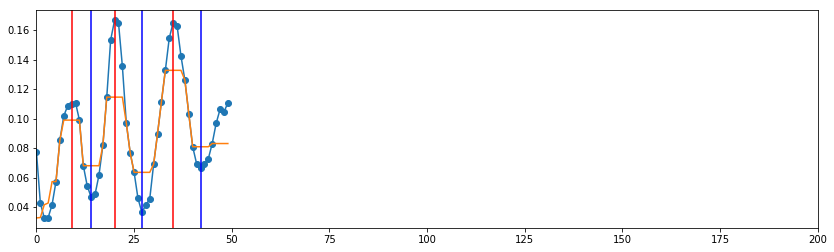

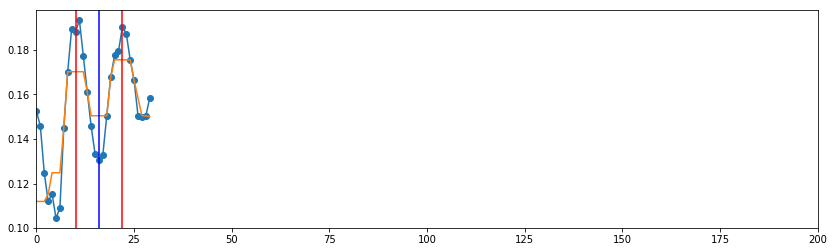

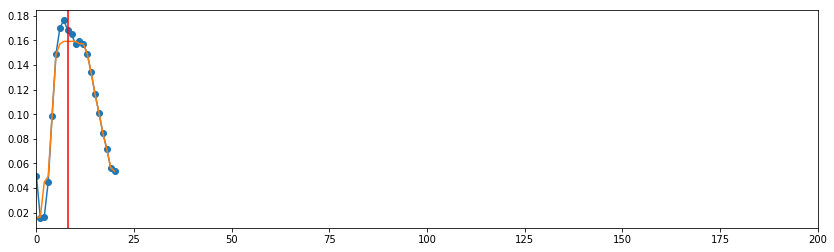

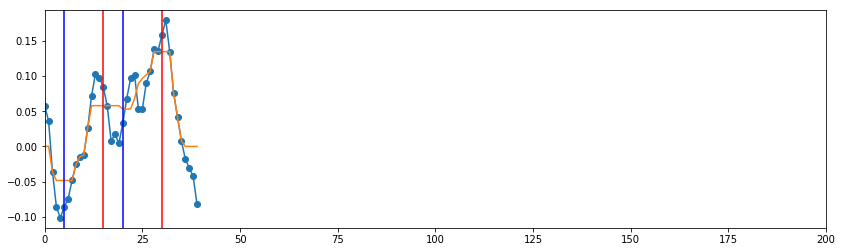

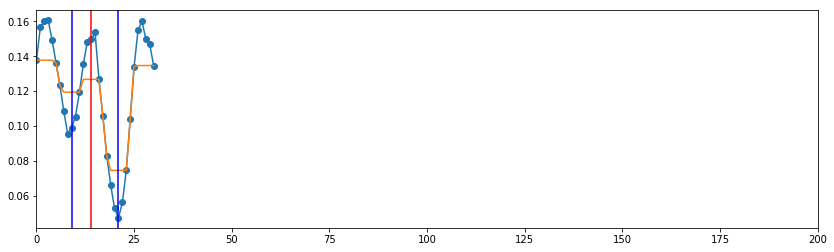

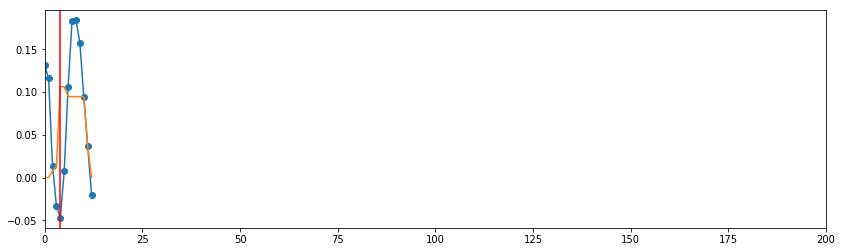

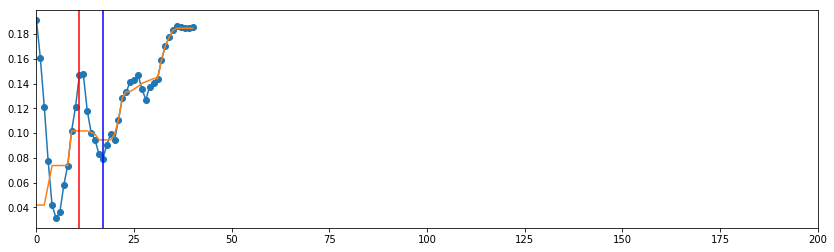

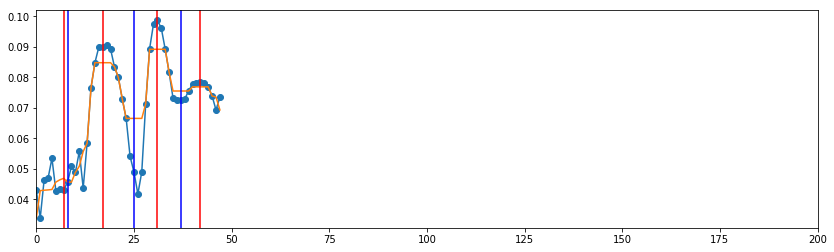

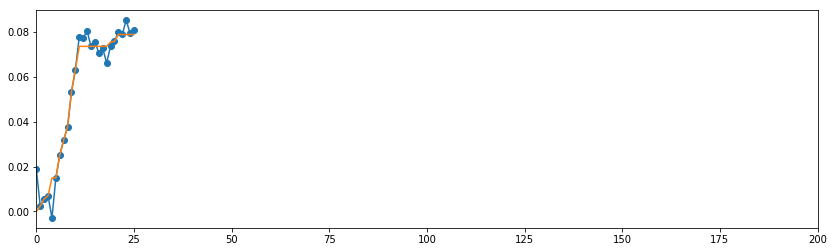

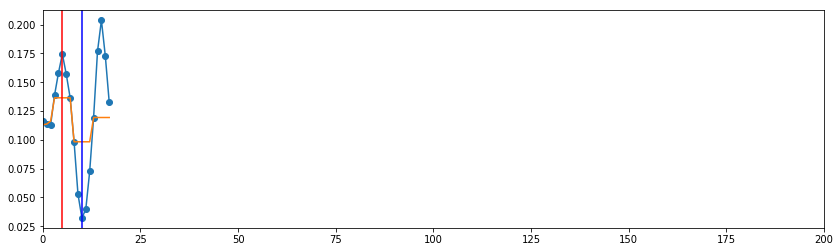

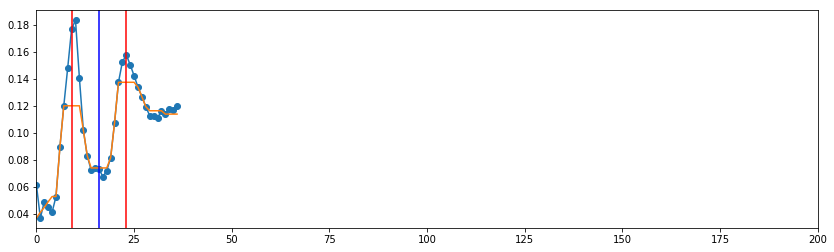

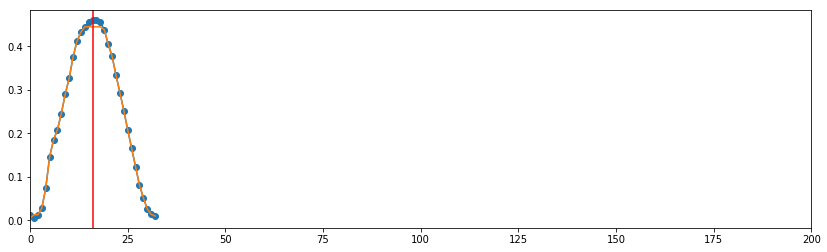

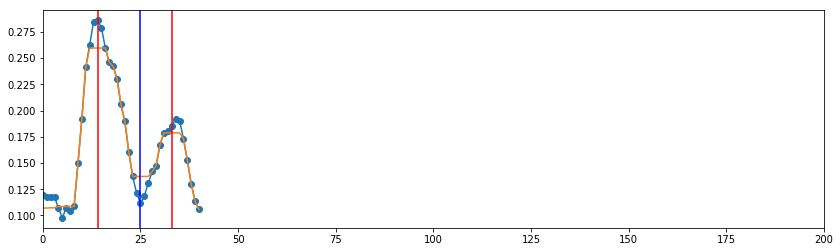

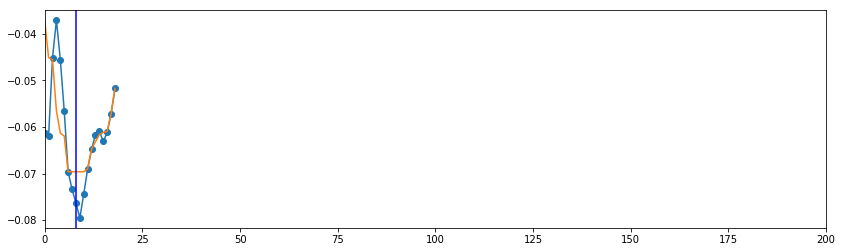

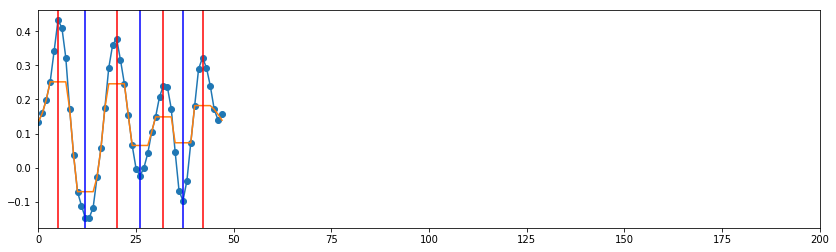

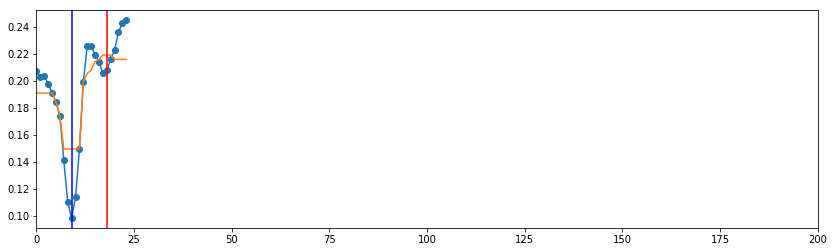

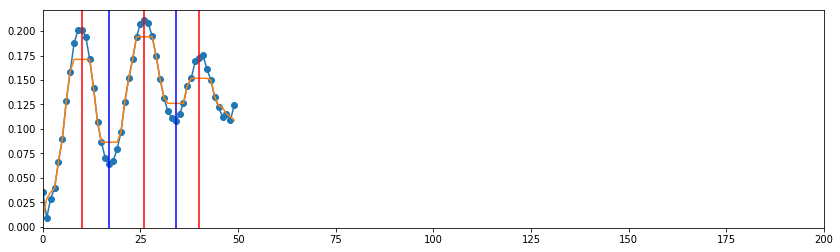

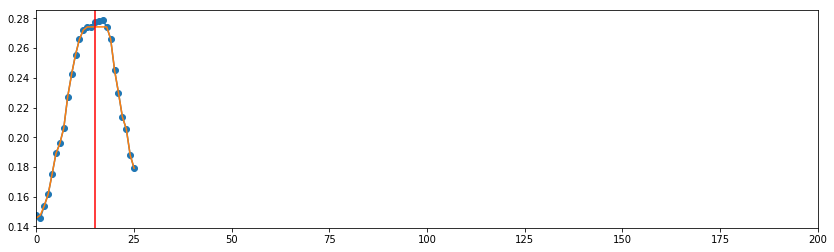

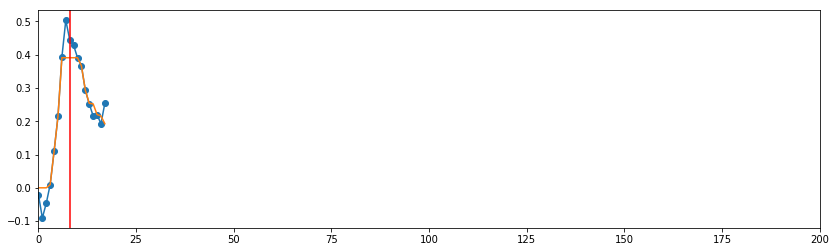

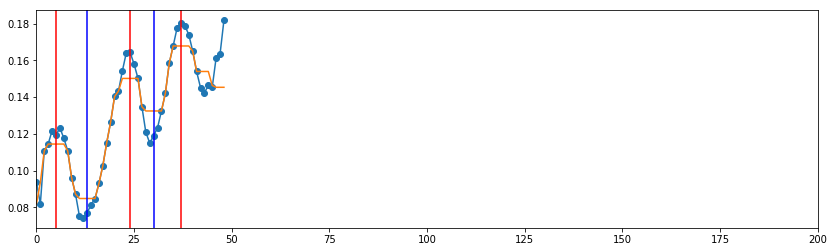

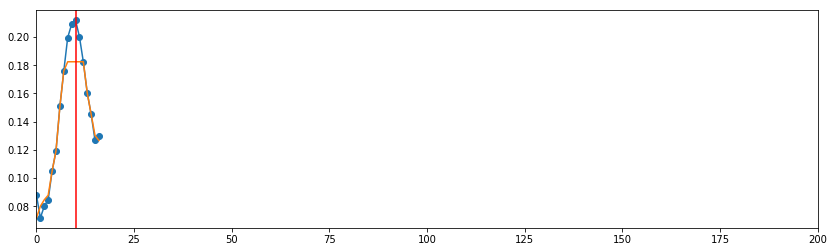

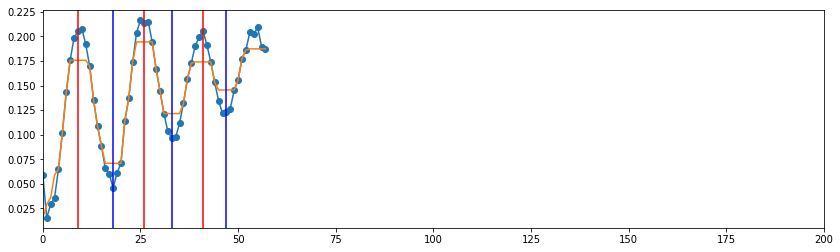

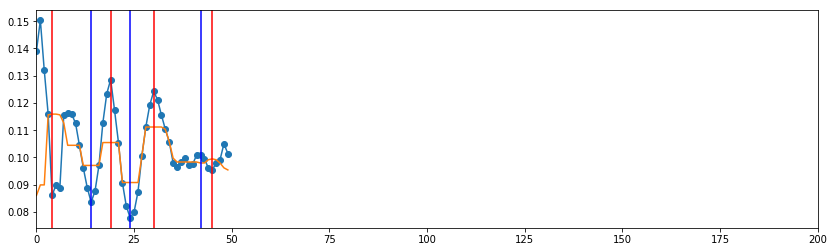

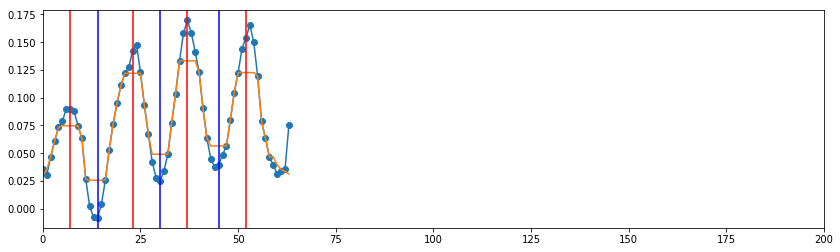

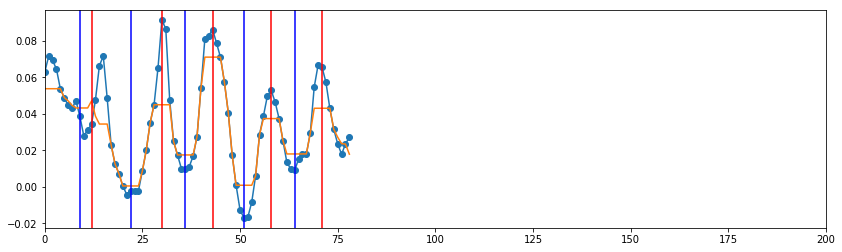

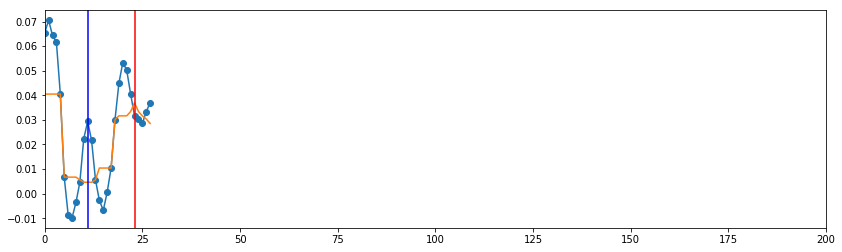

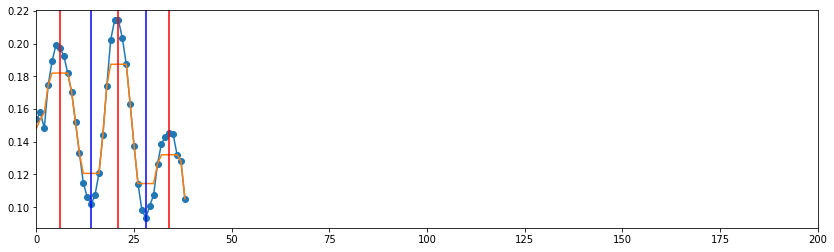

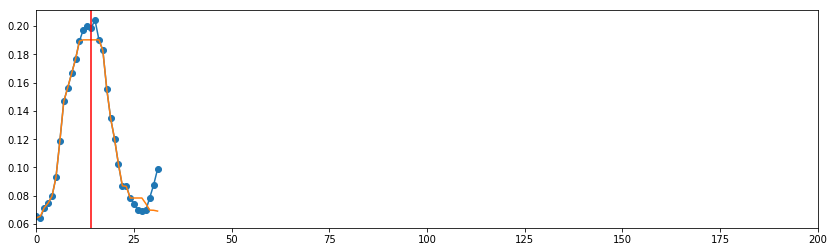

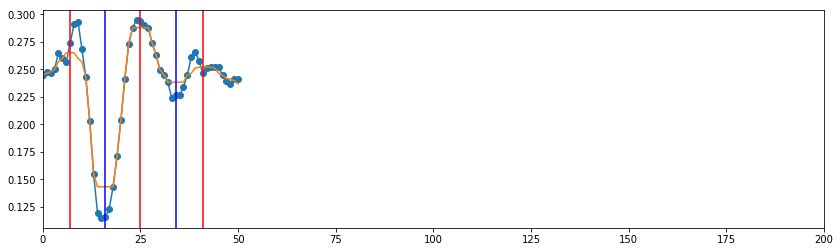

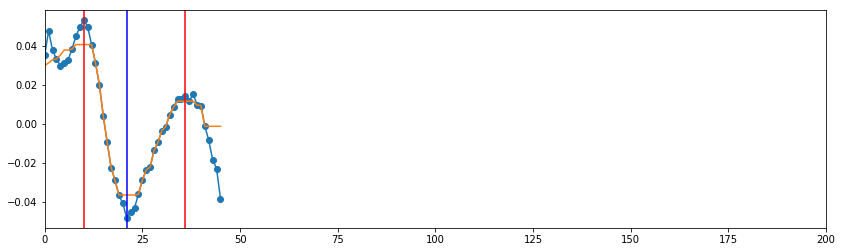

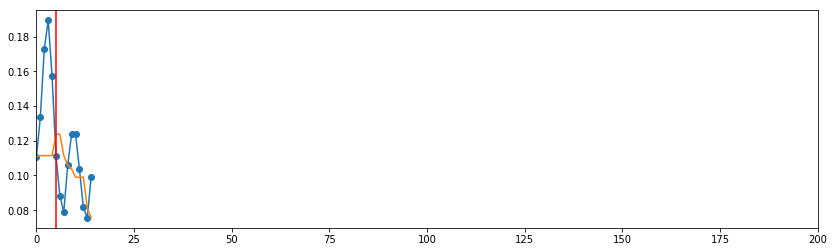

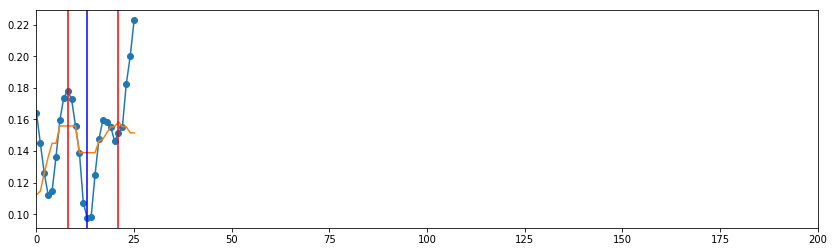

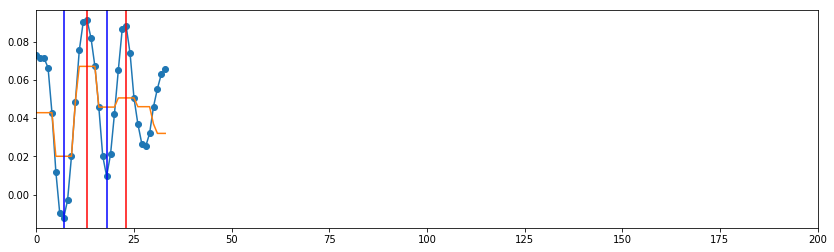

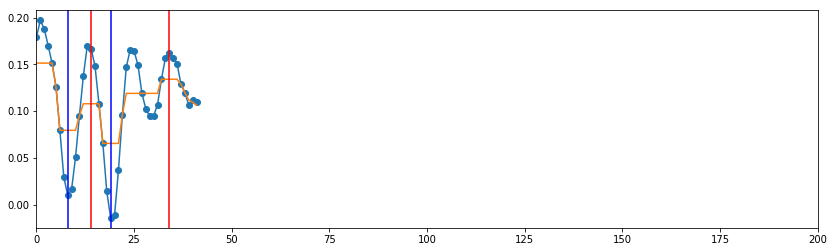

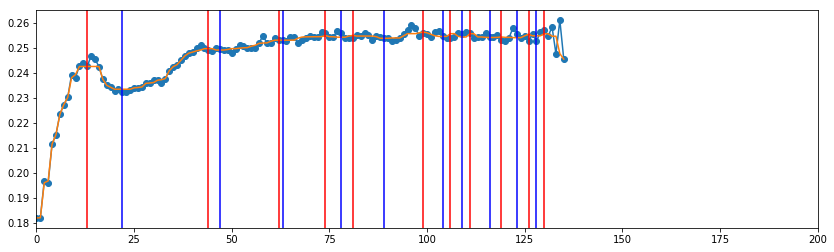

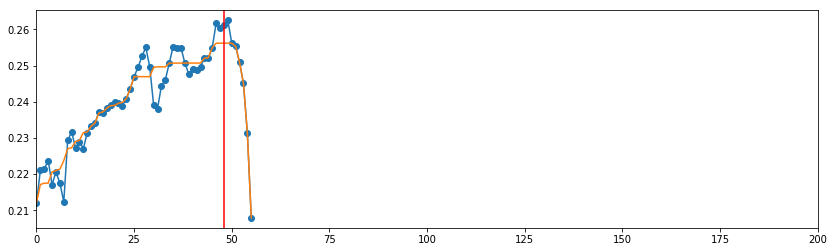

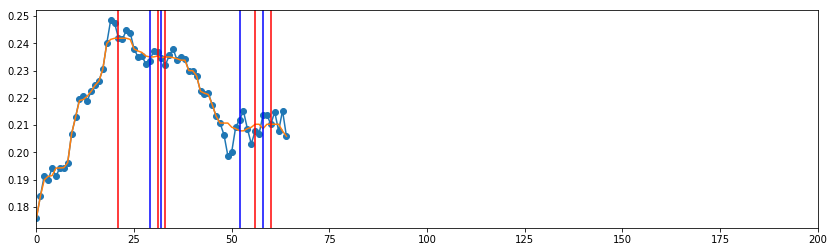

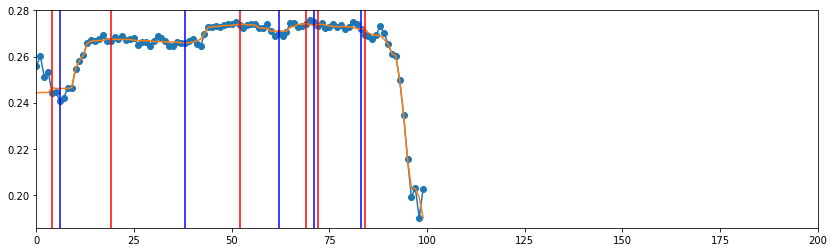

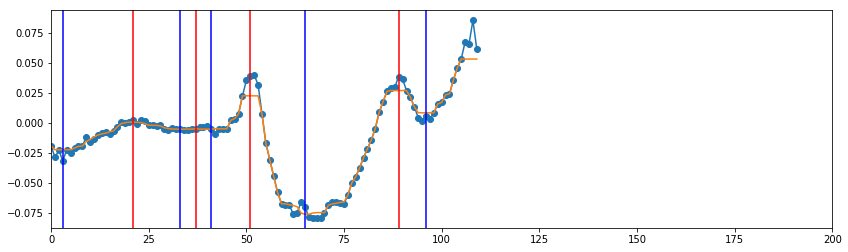

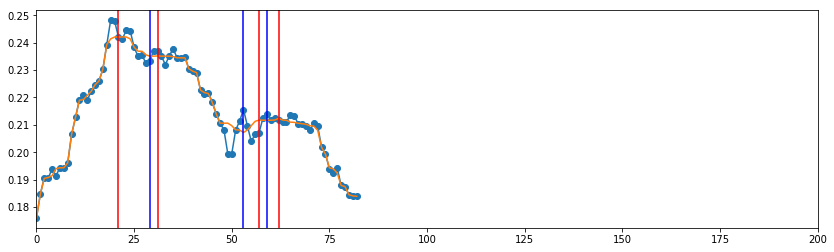

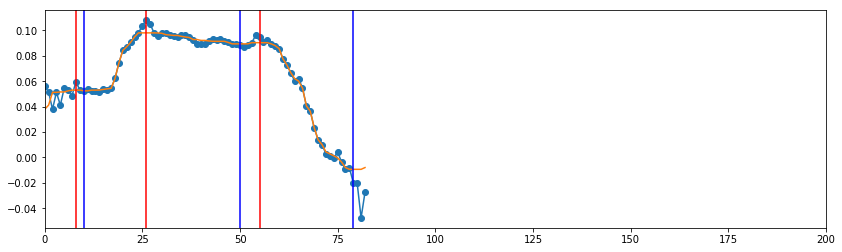

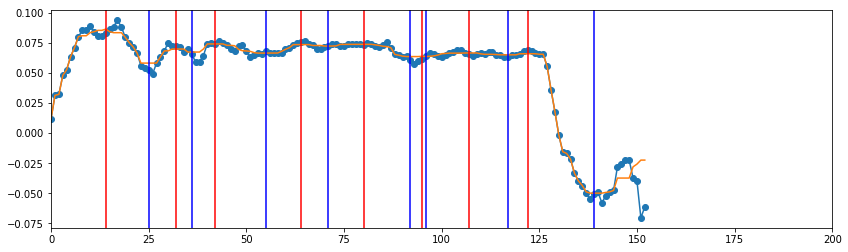

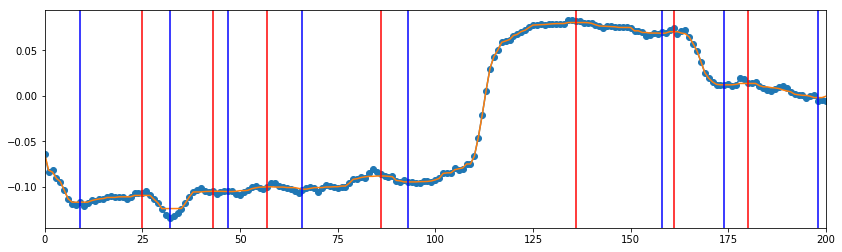

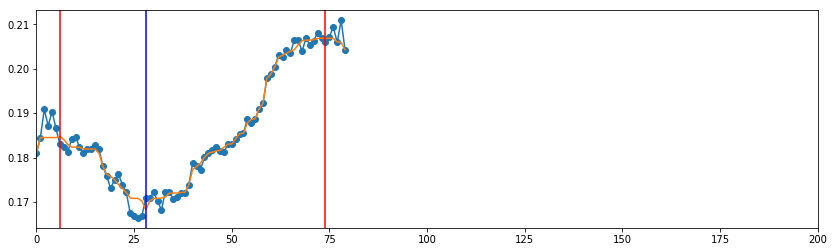

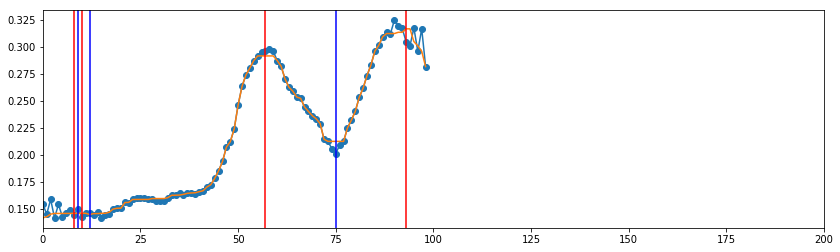

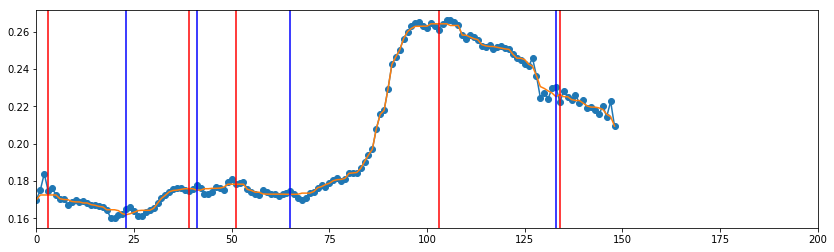

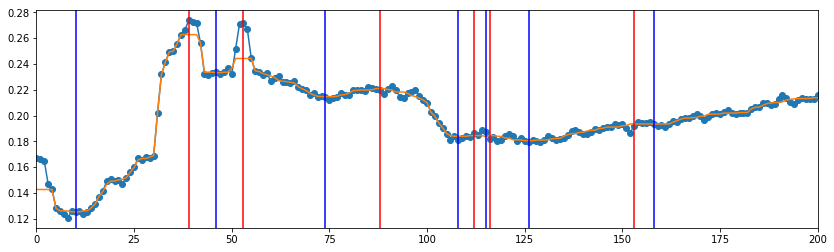

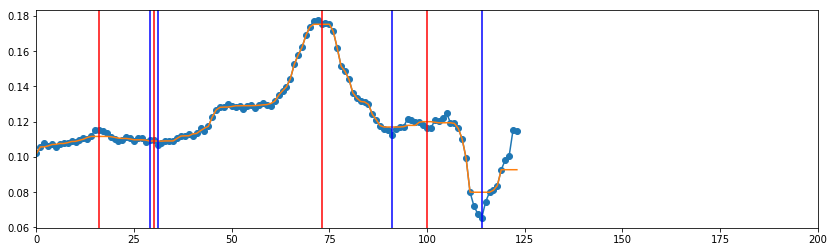

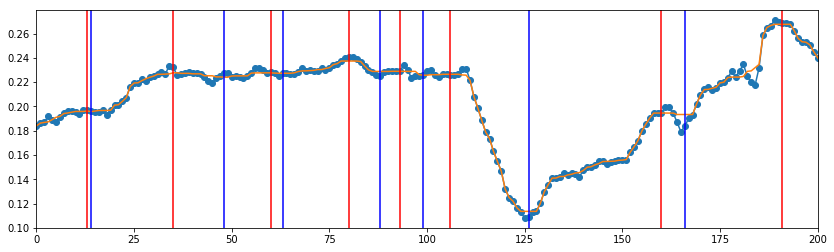

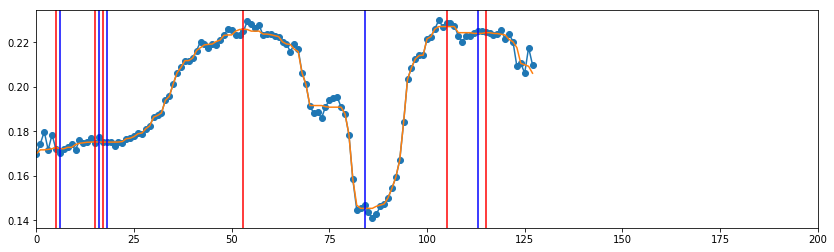

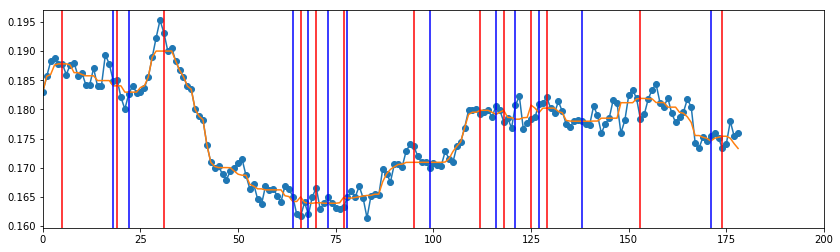

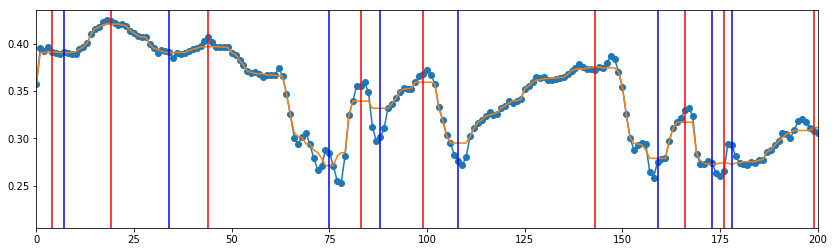

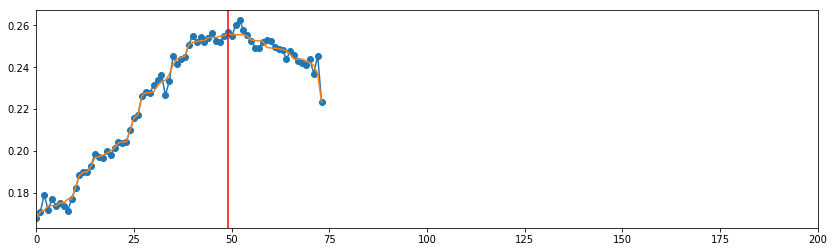

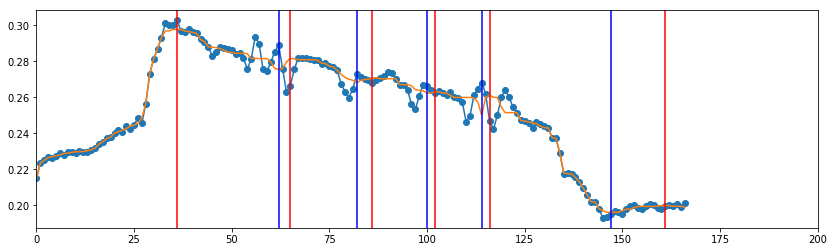

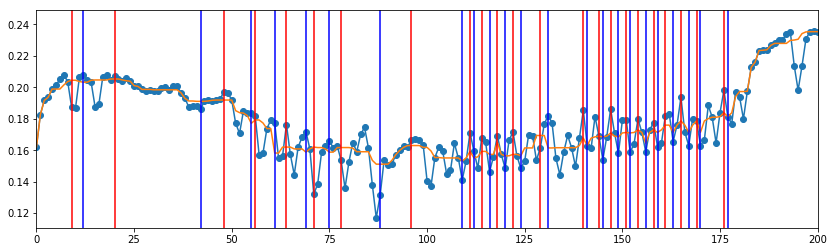

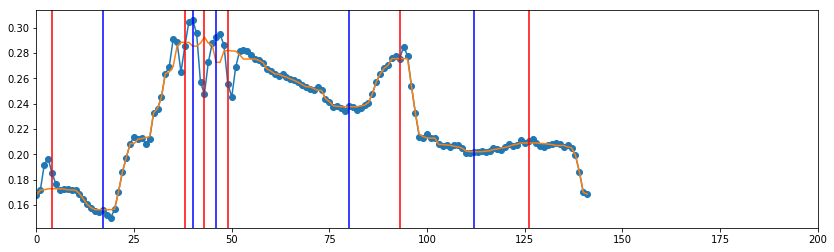

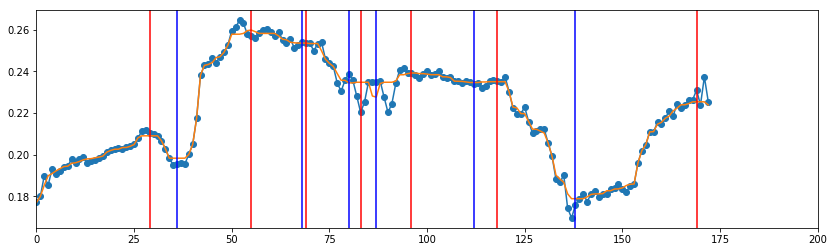

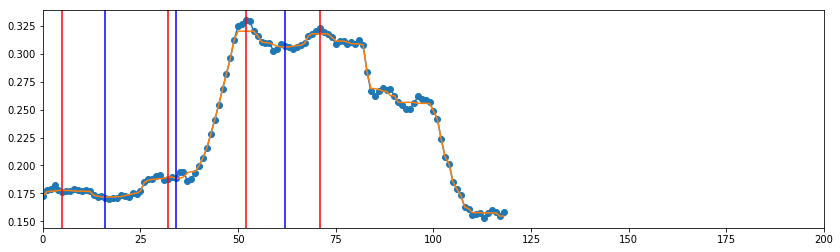

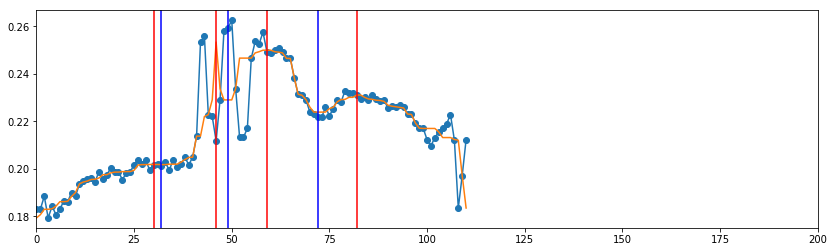

In [2]:
nod_x_widths,   nod_x_heights, avg_N_w, avg_N_h   = get_peaks_params(head_class='nod',   angle_type=angle_type_prefix+'x', derivative=0)
other_x_widths, other_x_heights, avg_O_w, avg_O_h = get_peaks_params(head_class='other', angle_type=angle_type_prefix+'x', derivative=0)


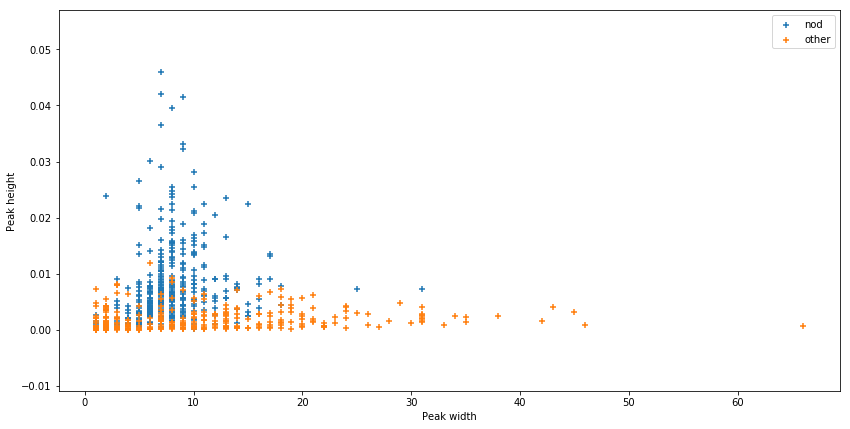

In [3]:
# PER-PEAK
# width and height/width

plt.figure(figsize=(14, 7))
plt.scatter(nod_x_widths, nod_x_heights, label='nod', marker='+')
plt.scatter(other_x_widths, other_x_heights, label='other', marker='+')
plt.xlabel('Peak width')
plt.ylabel('Peak height')
# plt.xlim(0.0, 50)
# plt.ylim(0.0, 0.005)
plt.legend()
plt.show()

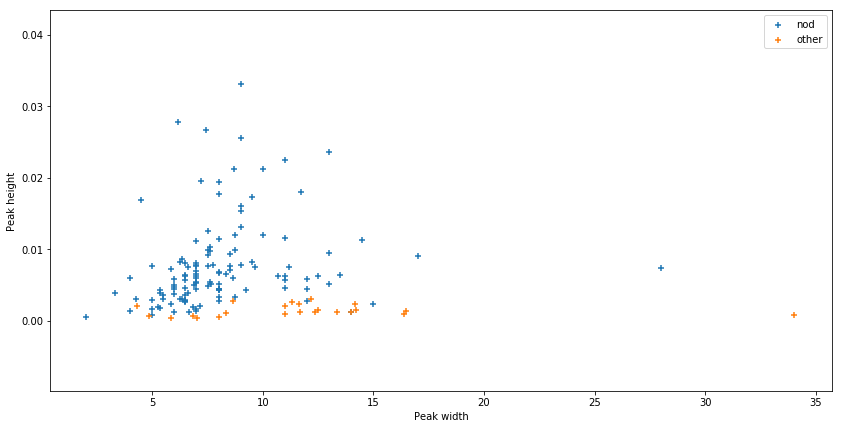

In [4]:
# average width per recording
# average height/width per recording

plt.figure(figsize=(14, 7))
plt.scatter(avg_N_w, avg_N_h, label='nod', marker='+')
plt.scatter(avg_O_w, avg_O_h, label='other', marker='+')
plt.xlabel('Peak width')
plt.ylabel('Peak height')
# plt.xlim(0.0, 50)
# plt.ylim(0.0, 0.005)
plt.legend()
plt.show()